In [109]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
sns.set(style="whitegrid")
%matplotlib inline
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
#function to display dataframes side by side    
from IPython.display import display_html
def display_side_by_side(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

In [110]:
def distplot(figRows,figCols,xSize, ySize, features, colors):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(vehicle[features[row][col]], color=colors[row][col], ax=axesplt, kde=True, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

In [111]:
def scatterplot(rowFeature, colFeature, data):
    f, axes = plt.subplots(1, 1, figsize=(10, 8))
        
    plot=sns.scatterplot(x=rowFeature, y=colFeature, data=data, hue='class', style='class', ax=axes)
    plot.set_xlabel(rowFeature,fontsize=20)
    plot.set_ylabel(colFeature,fontsize=20) 

In [112]:
def boxplot(figRows,figCols,xSize, ySize, features, colors, hue=None, orient='h', rotation=30):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.boxplot(features[row][col], data= vehicle, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_ylabel('',fontsize=20)
            plot.set_xticklabels(rotation=rotation, labels=[features[row][col]], fontweight='demibold',fontsize='large')

In [113]:
def boxplot_all(xSize, ySize, palette, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), palette='Set1', ax=axes, orient='v')
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

In [114]:
def countplot(figRows,figCols,xSize, ySize, features, colors=None,palette=None,hue=None, orient=None, rotation=90):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    if(colors is not None):
        colors = np.array(colors).reshape(figRows, figCols)
    if(palette is not None):
        palette = np.array(palette).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
                
            if(colors is None):
                plot = sns.countplot(features[row][col], data=vehicle, palette=palette[row][col], ax=axesplt, orient=orient, hue=hue)
            elif(palette is None):
                plot = sns.countplot(features[row][col], data=vehicle, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_title(features[row][col],fontsize=20)
            plot.set_xlabel(None)
            plot.set_xticklabels(rotation=rotation, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='large')

## Read the data as a data frame

In [115]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.head() 

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Perform basic EDA

a. Shape of the data

In [116]:
print('The total number of rows :', vehicle.shape[0])
print('The total number of columns :', vehicle.shape[1])

The total number of rows : 846
The total number of columns : 19


b. Data type of each attribute

In [117]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Observations
int64 Attributes
1. compactness
* max.length_aspect_ratio
* max.length_rectangularity
* hollows_ratio

float Attributes
1. circularity
* distance_circularity
* radius_ratio
* pr.axis_aspect_ratio
* scatter_ratio
* elongatedness
* pr.axis_rectangularity
* scaled_variance
* scaled_variance.1
* scaled_radius_of_gyration
* scaled_radius_of_gyration.1
* skewness_about
* skewness_about.1
* skewness_about.2

Checking the presence of missing values

In [118]:
display(vehicle.isna().sum().sort_values())
print('===================')
printmd('**CONCLUSION**: As seen from the data above, we conclude there are **"Missing"** values in the data', color="red")

compactness                    0
hollows_ratio                  0
max.length_aspect_ratio        0
max.length_rectangularity      0
class                          0
scatter_ratio                  1
elongatedness                  1
skewness_about.1               1
skewness_about.2               1
pr.axis_aspect_ratio           2
scaled_variance.1              2
scaled_radius_of_gyration      2
pr.axis_rectangularity         3
scaled_variance                3
distance_circularity           4
scaled_radius_of_gyration.1    4
circularity                    5
skewness_about                 6
radius_ratio                   6
dtype: int64

<span style='color:red'>**CONCLUSION**: As seen from the data above, we conclude there are **"Missing"** values in the data</span>

## 5 point summary of numerical attributes

In [119]:
display(vehicle.describe().transpose())

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Observations
Let us consider the following,

Max_Whisker = $Q3 + (1.5 \ast (IQR))$

Min_Whisker = $Q1 - (1.5 \ast (IQR))$

compactness - Looks evenly distributed as mean(93.6) and median(93) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

circularity - Looks evenly distributed as mean(44.8) and median(44) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

distance_circularity - Looks evenly distributed as mean(82) and median(80) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively. Despite having no outliers, the reason for mean being slightly higher would be because there are more records above the median value.

radius_ratio - Looks evenly distributed as mean(168.8) and median(167) are very close. However there are outliers on the higher side as $max\_value (333) > Max\_Whisker$.

pr.axis_aspect_ratio - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(61.6) and median(61) are very close. However there are few outliers on the higher side as $max\_value (138) > Max\_Whisker$. Hence right skewed.

max.length_aspect_ratio - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(8.5) and median(8) are very close. However there are many outliers on the higher side as $max\_value (55) > Max\_Whisker$ and few on the lower side as well as $min\_value (2) > Min\_Whisker$. Hence right skewed.

scatter_ratio - Looks skewed towards right as mean(168.9) is greater than the median(157) and there are outliers as $max\_value (265) > Max\_Whisker$.

elongatedness - Looks evenly distributed with mean(41) and median(43) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

pr.axis_rectangularity - Looks evenly distributed with mean(20.5) and median(20) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

max.length_rectangularity - Looks evenly distributed with mean(147) and median(146) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

scaled_variance - Looks skewed towards right as mean(188) is greater than the median(179) and there are outliers as $max\_value (320) > Max\_Whisker$.

scaled_variance.1 - Looks skewed towards right as mean(439) is greater than the median(363) and there are outliers as $max\_value (1018) > Max\_Whisker$.

scaled_radius_of_gyration - Looks evenly distributed with mean(174) and median(173.5) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker

scaled_radius_of_gyration.1 - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(72.4) and median(71.5) are very close. However there are many outliers on the higher side as $max\_value (135) > Max\_Whisker$. Hence right skewed.

skewness_about - Min value is zero. Looks evenly distributed if consider Q1,Q2,Q3 as mean(6.3) and median(6) are very close. However there are many outliers on the higher side as $max\_value (22) > Max\_Whisker$. Hence right skewed.

skewness_about.1 - Min value is zero. Looks skewed towards right as mean(12.6) is greater than median(11) and there are few outliers on the higher side as $max\_value (41) > Max\_Whisker$. Hence right skewed.

skewness_about.2 - Looks evenly distributed with mean(188.9) and median(188) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker

hollows_ratio - Looks evenly distributed with mean(195.6) and median(197) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker


## Replace missing values with Median

In [120]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(missing_values=np.nan, strategy='median')
cols = vehicle.columns[:18]
vehicle.iloc[:,:18] = sim.fit_transform(vehicle.iloc[:,:18])
vehicle.iloc[:,:18] = pd.DataFrame(vehicle.iloc[:,:18], columns=cols)

In [121]:
display(vehicle.isna().sum().sort_values())
print('===================')
printmd('**CONCLUSION**: **"Missing"** values are replaced with **Median** of the respective attributes', color="green")

compactness                    0
skewness_about.2               0
skewness_about.1               0
skewness_about                 0
scaled_radius_of_gyration.1    0
scaled_radius_of_gyration      0
scaled_variance.1              0
scaled_variance                0
hollows_ratio                  0
max.length_rectangularity      0
elongatedness                  0
scatter_ratio                  0
max.length_aspect_ratio        0
pr.axis_aspect_ratio           0
radius_ratio                   0
distance_circularity           0
circularity                    0
pr.axis_rectangularity         0
class                          0
dtype: int64

<span style='color:green'>**CONCLUSION**: **"Missing"** values are replaced with **Median** of the respective attributes</span>

### Univariate Analysis of Continuous Atttributes and Distrbutions

In [122]:
pal = sns.color_palette(palette='Set1', n_colors=16)

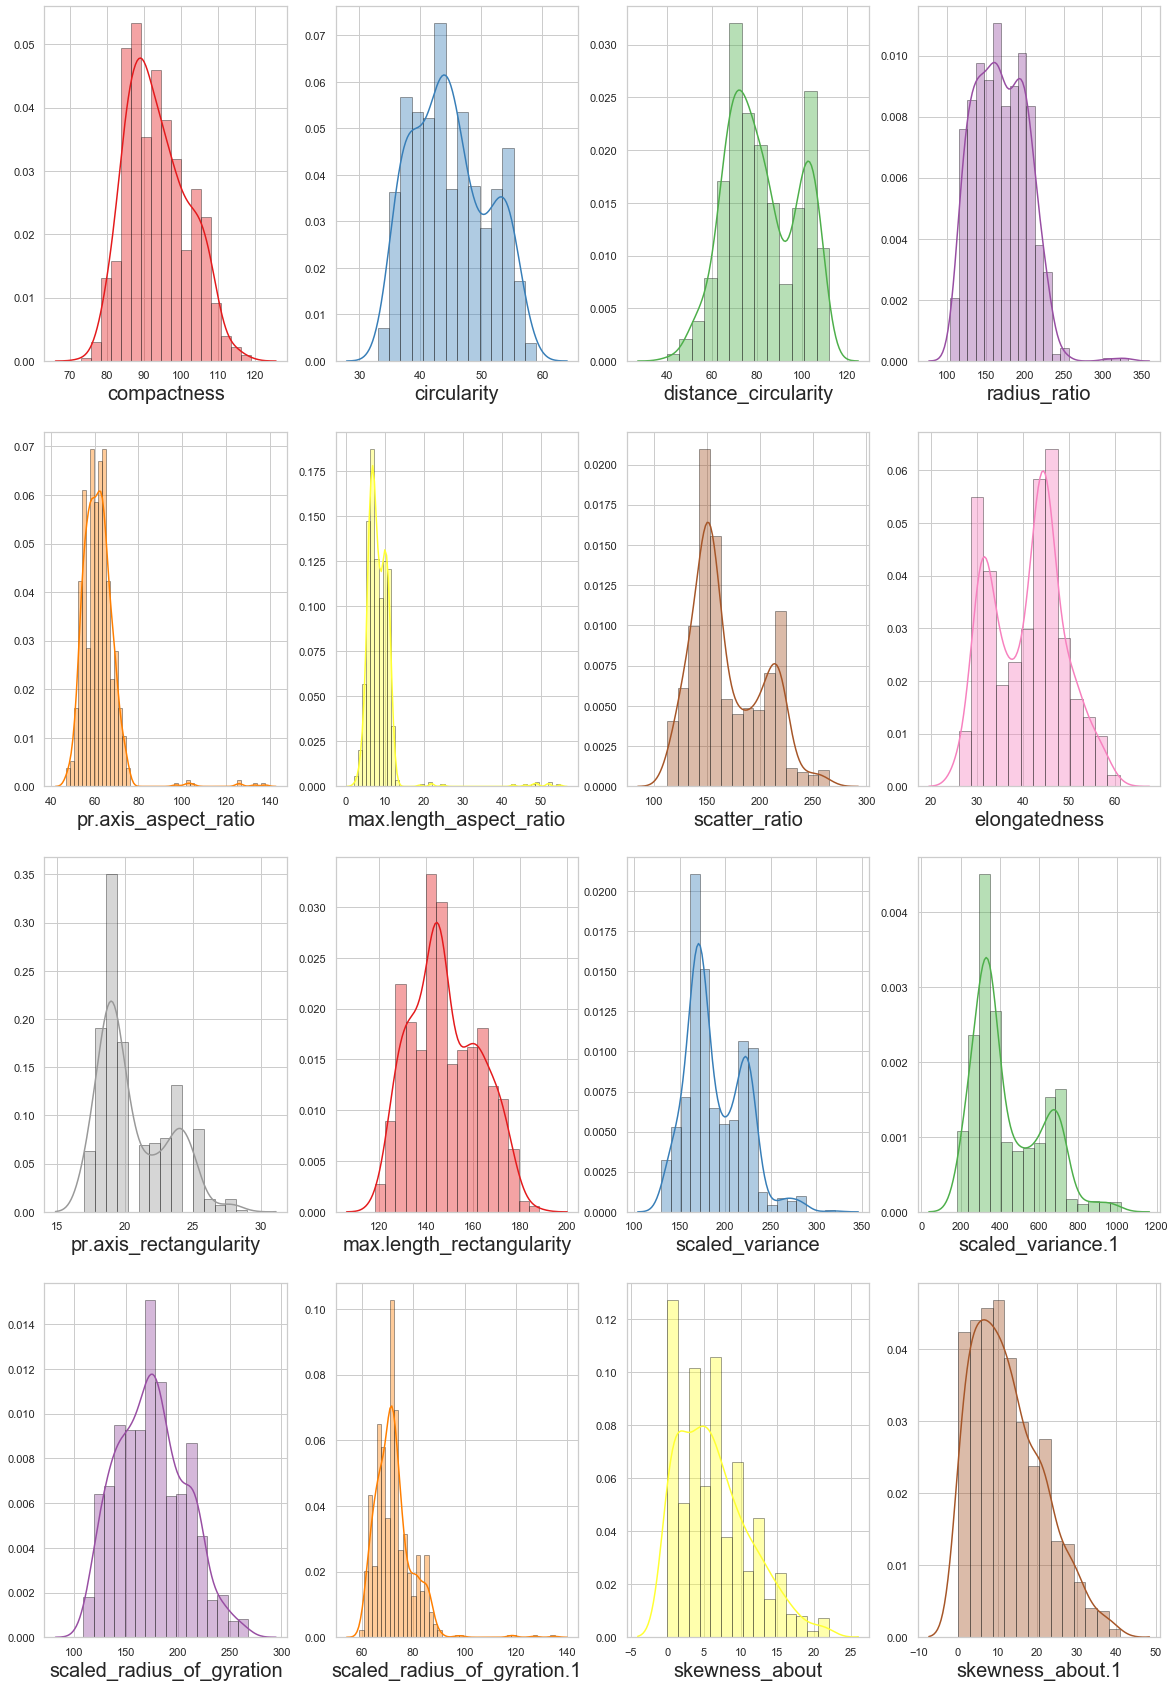

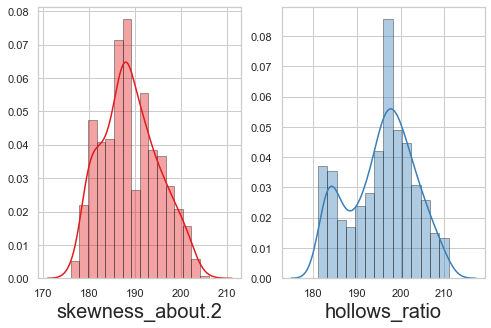

In [123]:
distplot(4, 4, 20, 30, vehicle.columns[:16].tolist(), pal.as_hex())
distplot(1, 2, 8, 5, vehicle.columns[16:18].tolist(), pal.as_hex()[:2])

# Observations
compactness - Looks normally distributed.

circularity - Looks uniformly distributed.

distance_circularity - Looks evenly distributed but there are more values distributed on the higher side.

radius_ratio - Looks skewed towards right as we can see few values above 300. Must be outliers.

pr.axis_aspect_ratio - Looks skewed towards right as we can see few values above 100. Must be outliers.

max.length_aspect_ratio - Looks skewed towards right as we can see few values above 20. Must be outliers.

scatter_ratio - Looks evenly distributed.

elongatedness - Looks evenly distributed.

pr.axis_rectangularity - Looks evenly distributed with few values missing between 20 and 25.

max.length_rectangularity - Looks normally distributed.

scaled_variance - Looks skewed towards right as we can see few values above 300. Must be outliers.

scaled_variance.1 - Looks skewed towards right as we can see few values above 1000. Must be outliers.

scaled_radius_of_gyration - Looks normally distributed.

scaled_radius_of_gyration.1 - Looks skewed towards right as we can see few values above 100. Must be outliers.

skewness_about - Looks skewed towards right as we can see few values above 20. Must be outliers.

skewness_about.1 - Looks skewed towards right as we can see few values above 40. Must be outliers.

skewness_about.2 - Looks normally distributed.

hollows_ratio - Looks evenly distributed

## Checking the presence of Outliers

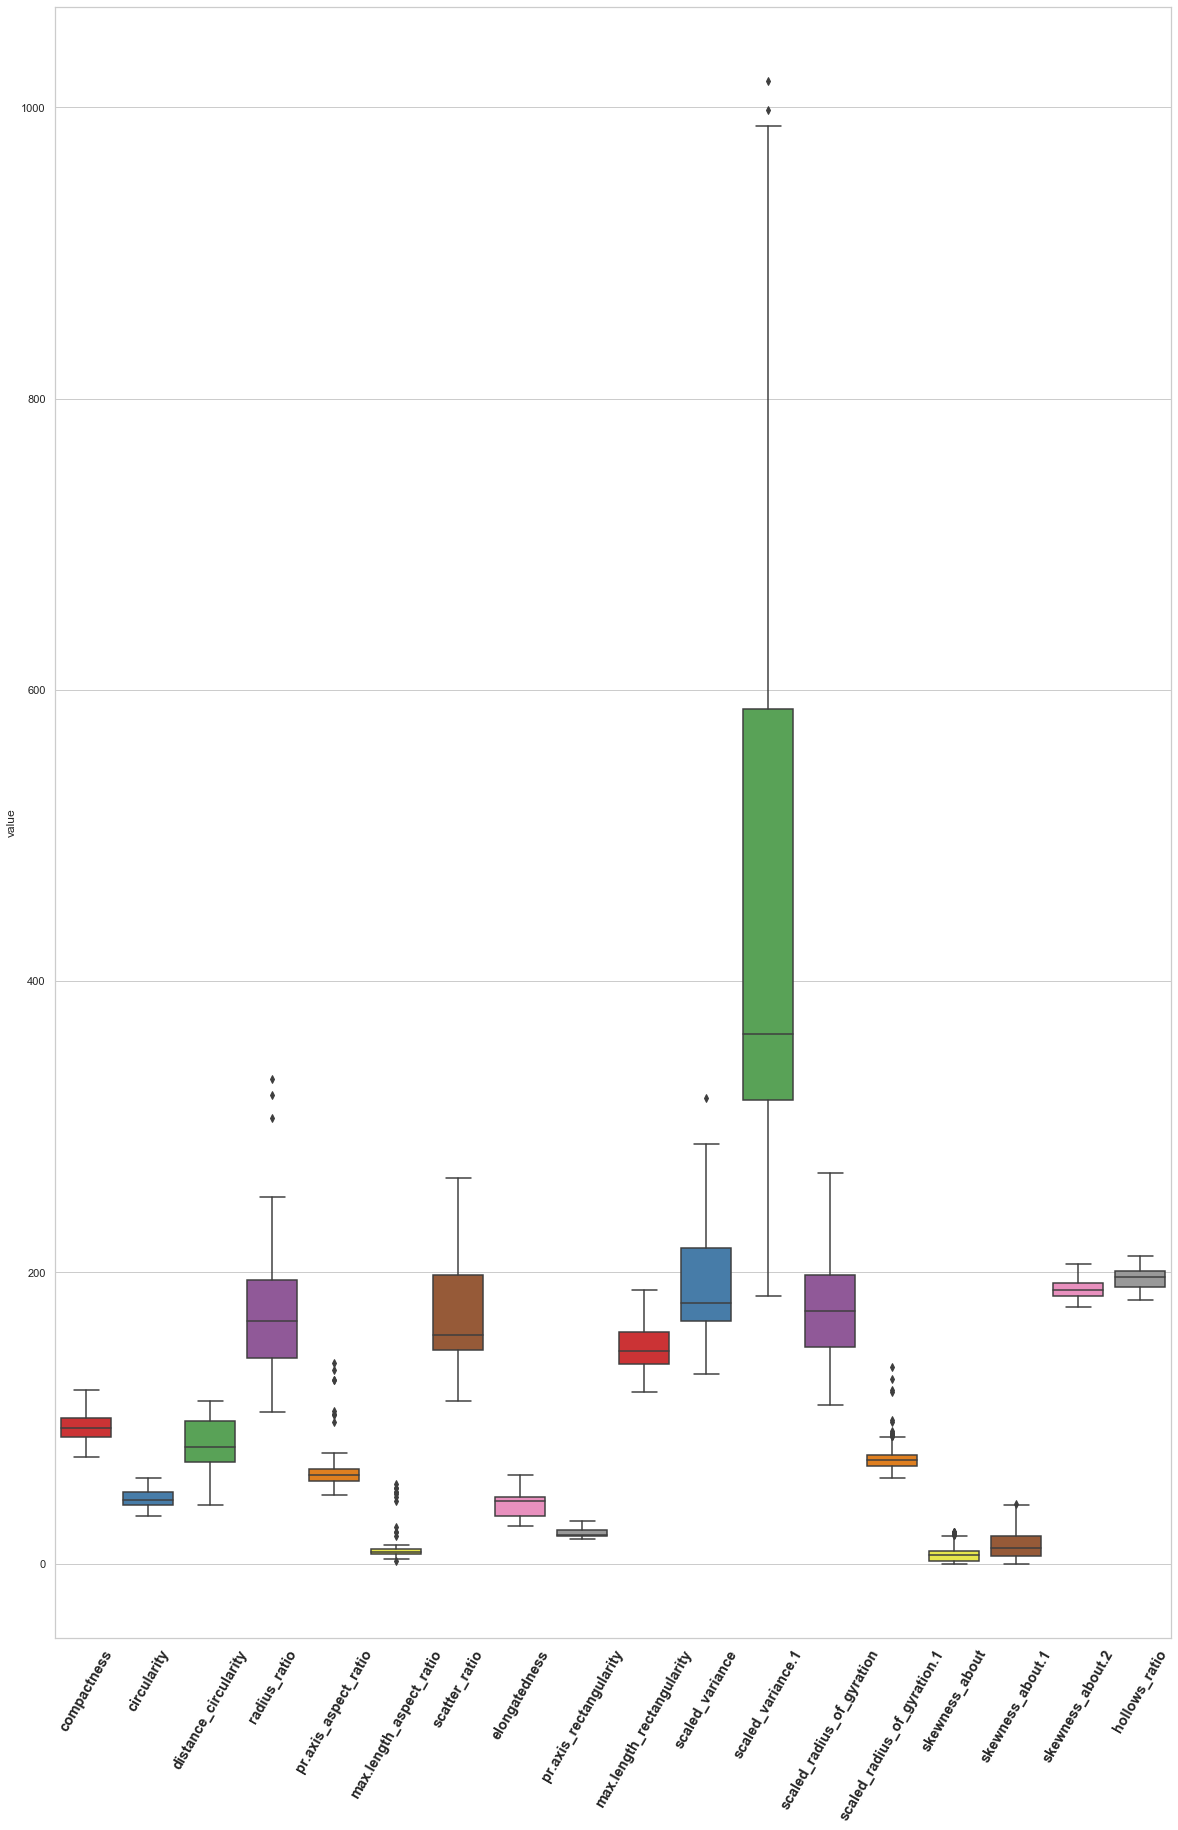

In [124]:
boxplot_all(20,30,palette=['Set1'], data =vehicle.iloc[:,:18])

### Observations
Presence of outliers are detected for the below attributes
pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration.1, radius_ratio, scaled_variance.1, scaled_variance, skewness_about, skewness_about.1
All other attributes are evenly distributed.

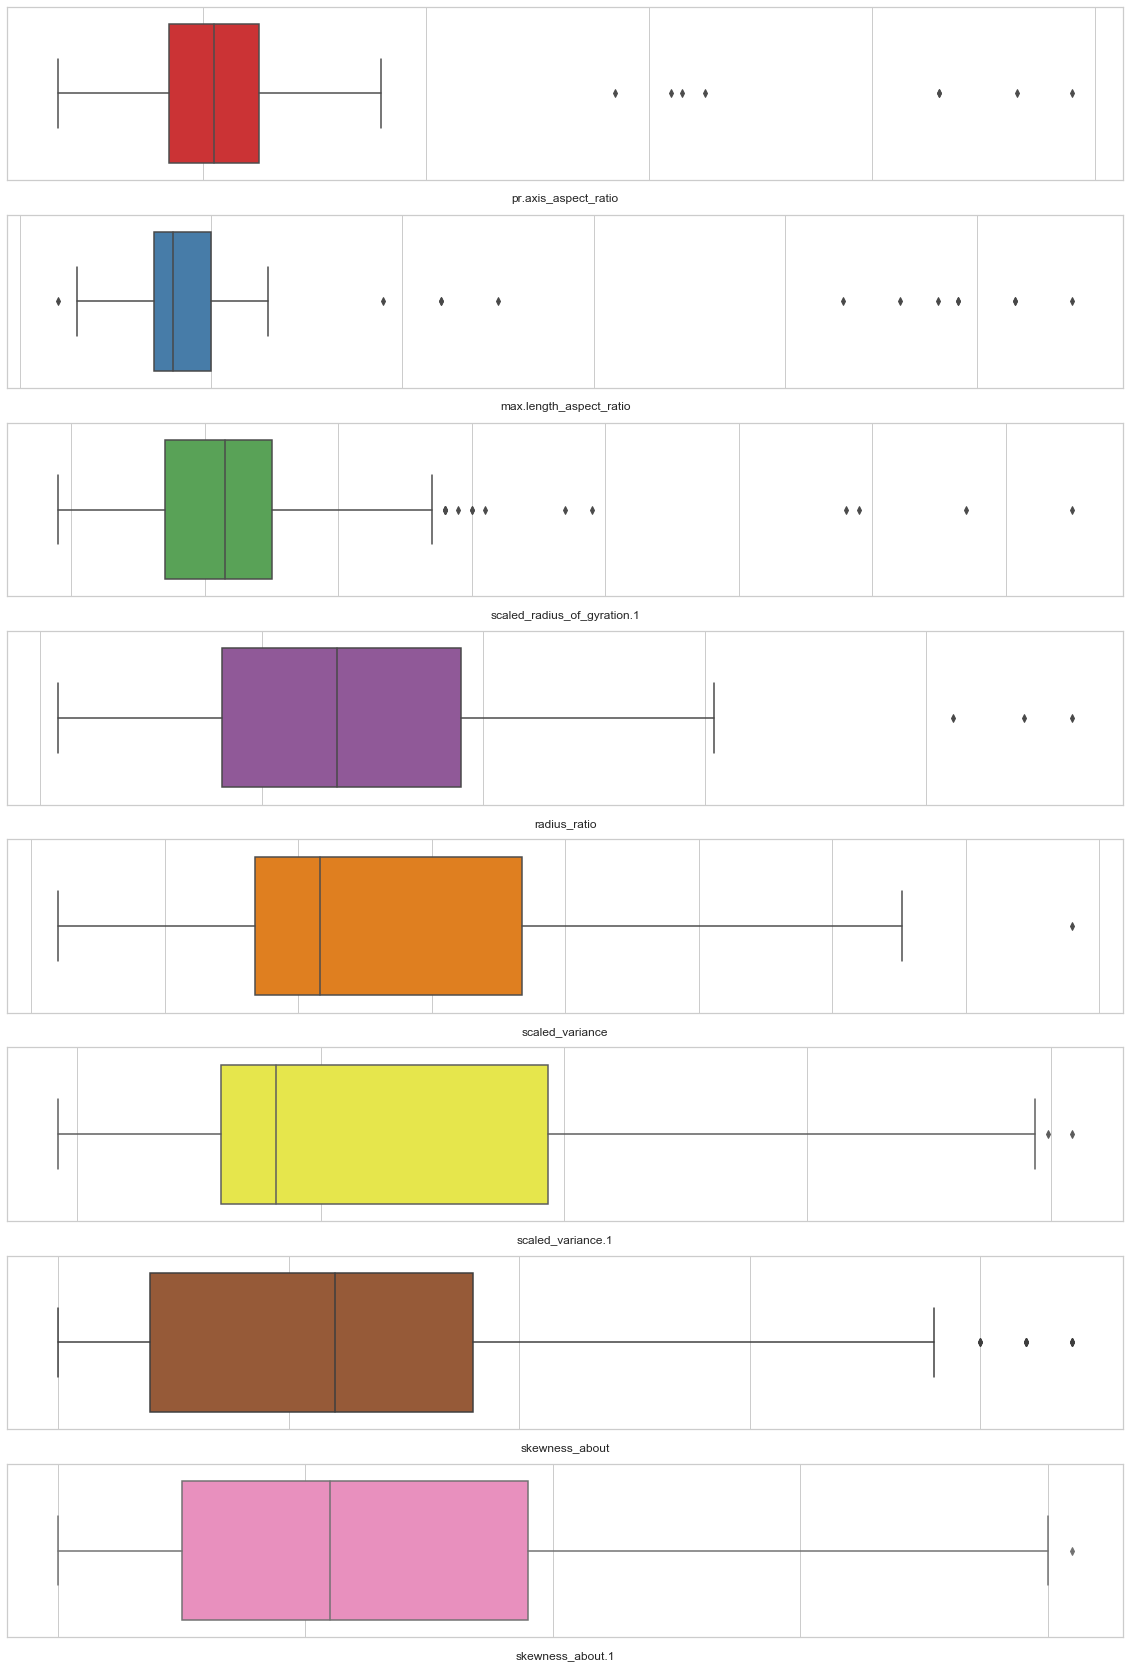

In [125]:
boxplot(8, 1, 20, 30, orient='h', 
        features=['pr.axis_aspect_ratio',
                  'max.length_aspect_ratio',
                  'scaled_radius_of_gyration.1',
                  'radius_ratio',
                  'scaled_variance',
                  'scaled_variance.1',
                 'skewness_about',
                 'skewness_about.1'], 
        colors=pal.as_hex()[:8])

### Observations
pr.axis_aspect_ratio - Several outliers are seen on the higher side

max.length_aspect_ratio - Several outliers are seen on the higher side and one on the lower side as well.

scaled_radius_of_gyration.1 - Several outliers are seen on the higher side with some values being very large.

radius_ratio - Few outliers are seen on the higher side.

scaled_variance - One outlier is seen on the higher side.

scaled_variance.1 - Two outliers are seen on the higher side.

skewness_about - Three outliers are seen on the higher side.

skewness_about.1 - One outlier is seen on the higher side.

And hence confirms the skewness for theses attributes

### Bivariate Analysis with 'class' attribute

In [126]:
def point_box_bar_plot(row, col, figRow, figCol, palette='rocket', fontsize='large', fontweight='demibold'):
    sns.set(style="whitegrid")
    f, axes = plt.subplots(3, 1, figsize=(figRow, figCol))
    pplot=sns.pointplot(row,col, data=vehicle, ax=axes[0], linestyles=['--'])
    pplot.set_xlabel(None)
    pplot.set_xticklabels(labels=pplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bxplot=sns.boxplot(row,col, data=vehicle, ax=axes[1],palette='Paired')
    bxplot.set_xlabel(None)
    bxplot.set_xticklabels(labels=bxplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bplot=sns.barplot(row,col, data=vehicle, ax=axes[2],palette=palette)
    bplot.set_xlabel(row,fontsize=20)
    bplot.set_xticklabels(labels=bplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)

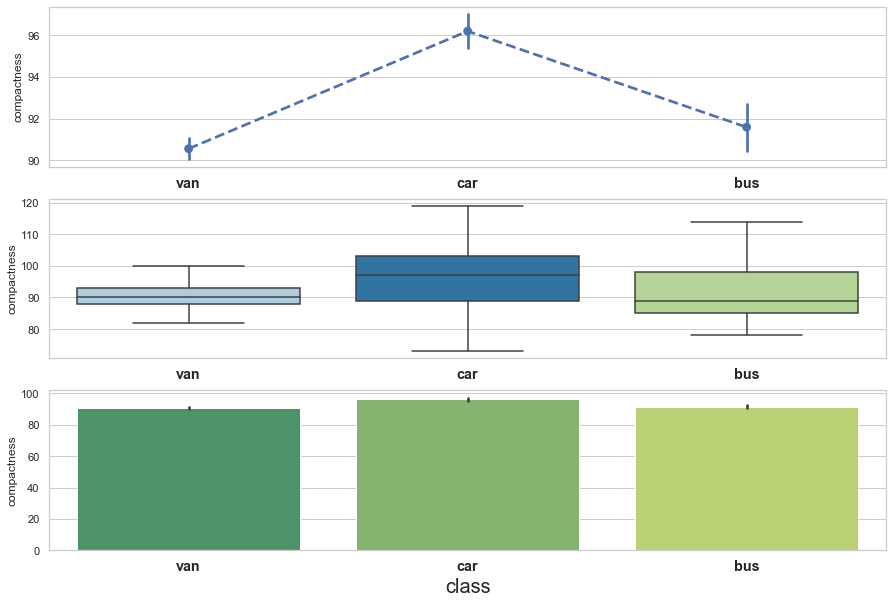

In [127]:
point_box_bar_plot('class','compactness', 15, 10, palette='summer')

### Observations

As shown, compactness of the car is higher than others with values for bus and van being close.
bus having large range of compactness compared to van.

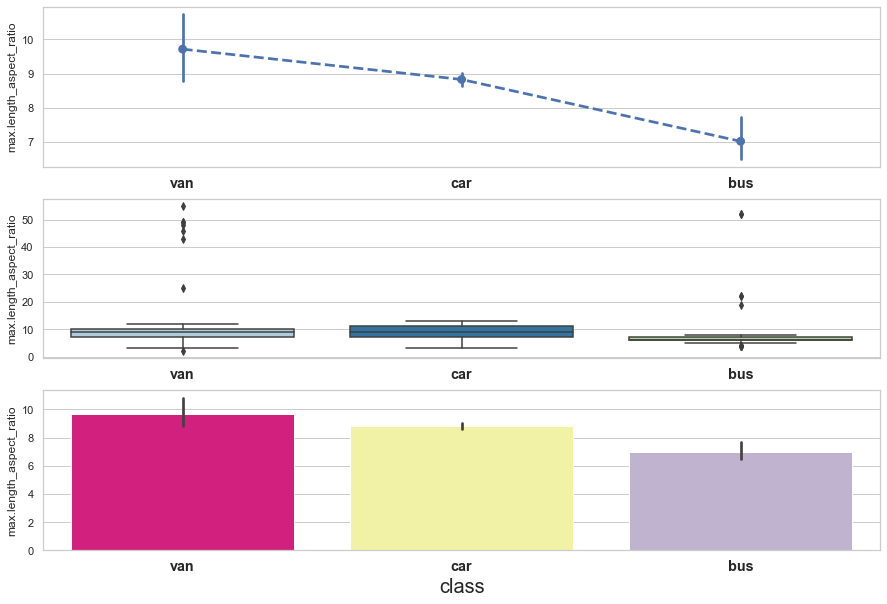

In [128]:
point_box_bar_plot('class','max.length_aspect_ratio', 15, 10, palette='Accent_r')

### Observations
Outliers are detected for van and bus.

No outliers for car.

max.length_aspect_ratio of the van is higher because of several large outliers. It is followed by car and then bus.

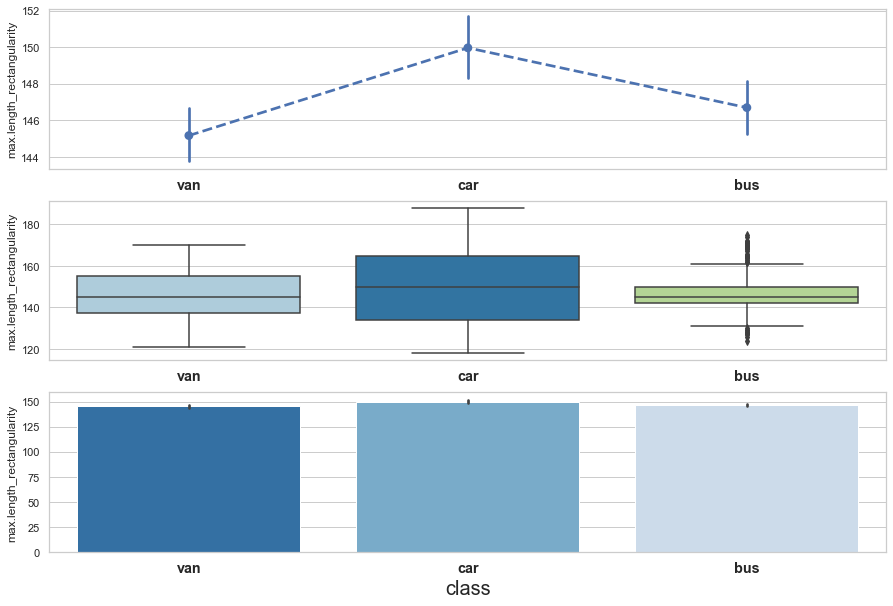

In [129]:
point_box_bar_plot('class','max.length_rectangularity', 15, 10, palette='Blues_r')

### Observations
max.length_rectangularity of the car is higher followed by bus and then van.

Outliers are detected for bus and hence its value is shown higher than van despite van having larger range of max.length_rectangularity

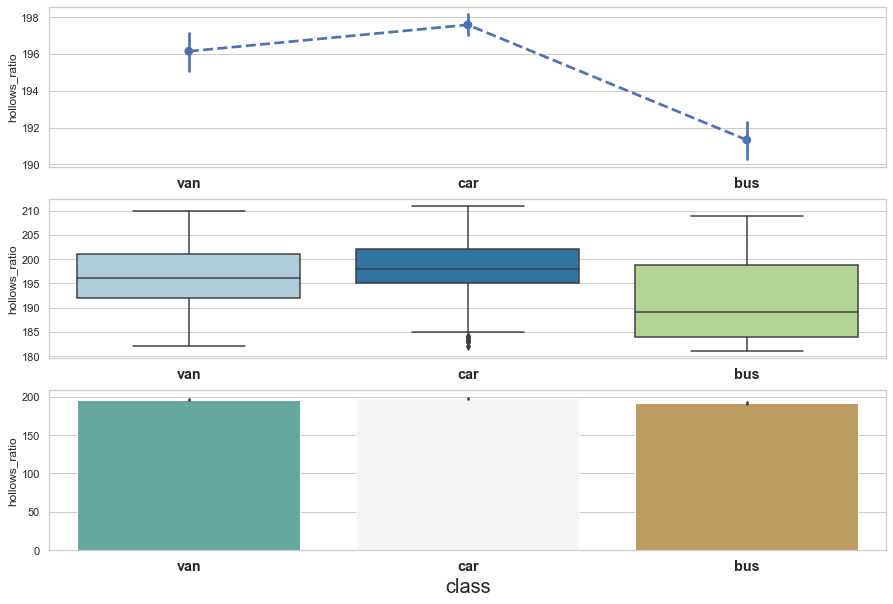

In [130]:
point_box_bar_plot('class','hollows_ratio', 15, 10, palette='BrBG_r')

### Observations

hollows_ratio of the car and van are very close followed by bus.

Outliers are detected for car on the lower side
bus is having large range of hollows_ratio compared to others.

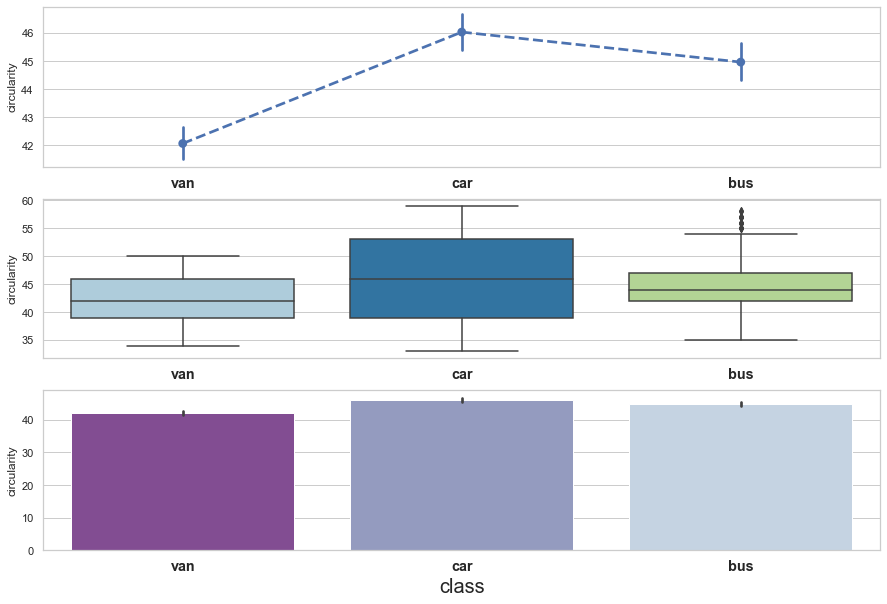

In [131]:
point_box_bar_plot('class','circularity', 15, 10, palette='BuPu_r')

### Observations

circularity of the car and bus are very close followed by van.

Outliers are detected for bus on the higher side
car is having large range of circularity compared to others.

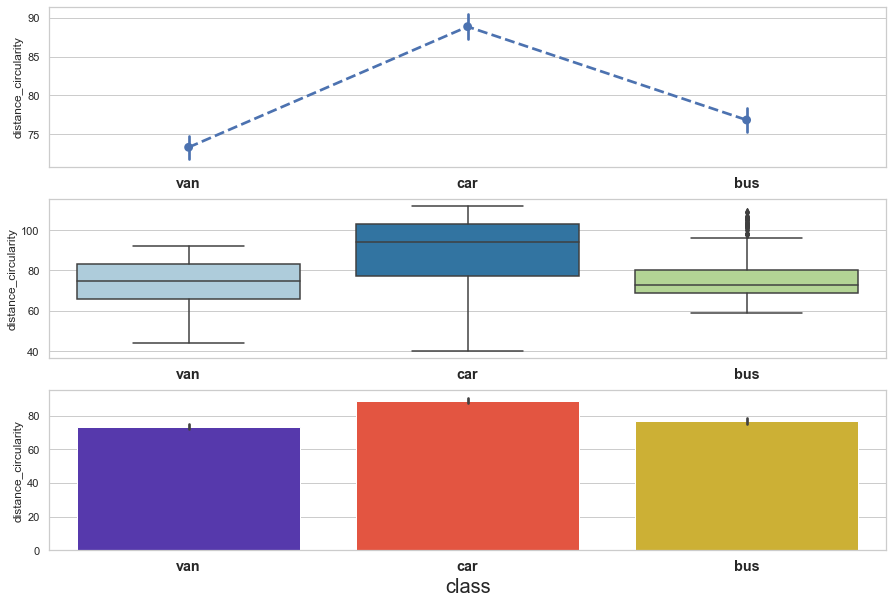

In [132]:
point_box_bar_plot('class','distance_circularity', 15, 10, palette='CMRmap')

### Observations

distance_circularity of the car is higher compared to others followed by bus and then by van.

Outliers are detected for bus on the higher side.

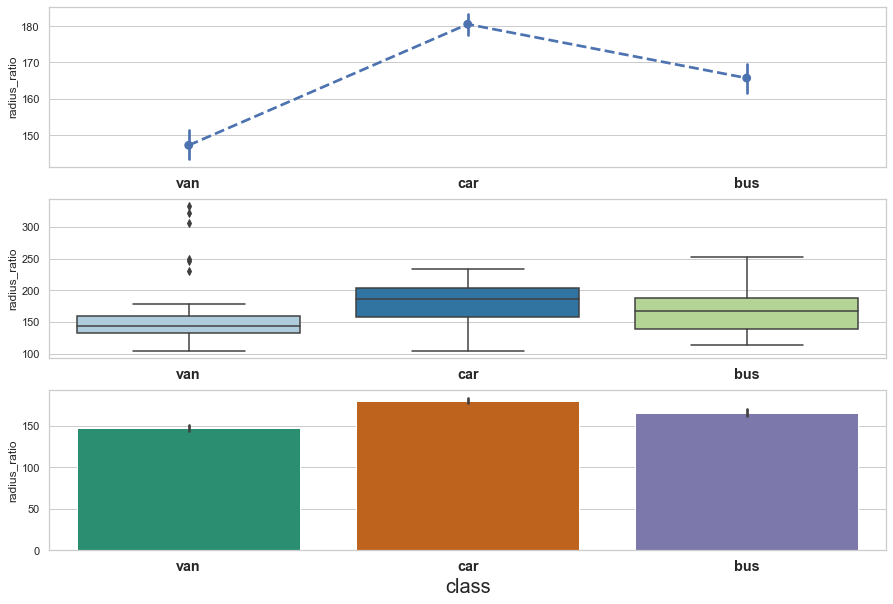

In [133]:
point_box_bar_plot('class','radius_ratio', 15, 10, palette='Dark2')

### Observations

radius_ratio of the car is higher compared to others followed by bus and then by van.

Outliers are detected for van on the higher side.

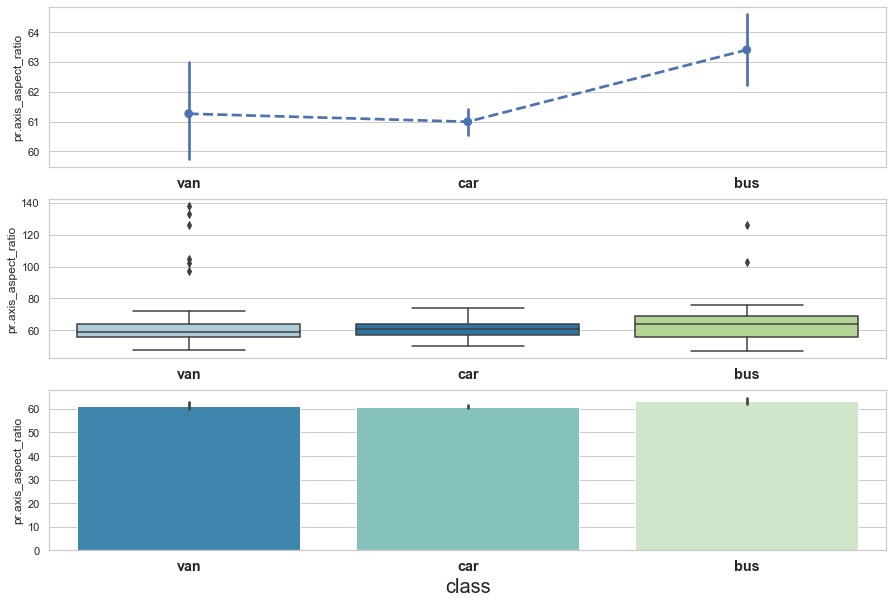

In [134]:
point_box_bar_plot('class','pr.axis_aspect_ratio', 15, 10, palette='GnBu_r')

### Observations¶
Outliers are detected for van and bus.

No outliers for car.

pr.axis_aspect_ratio of bus is higher than others.

Despite having large outliers, pr.axis_aspect_ratio of van and car are close.

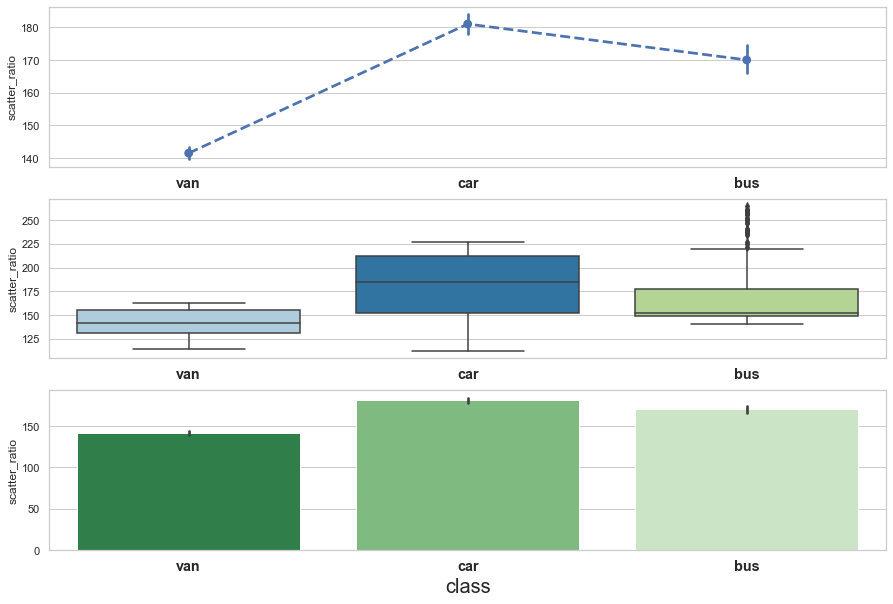

In [135]:
point_box_bar_plot('class','scatter_ratio', 15, 10, palette='Greens_r')

### Observations

Outliers are detected for bus.

scatter_ratio of car is higher followed by bus.

scatter_ratio of van is low.

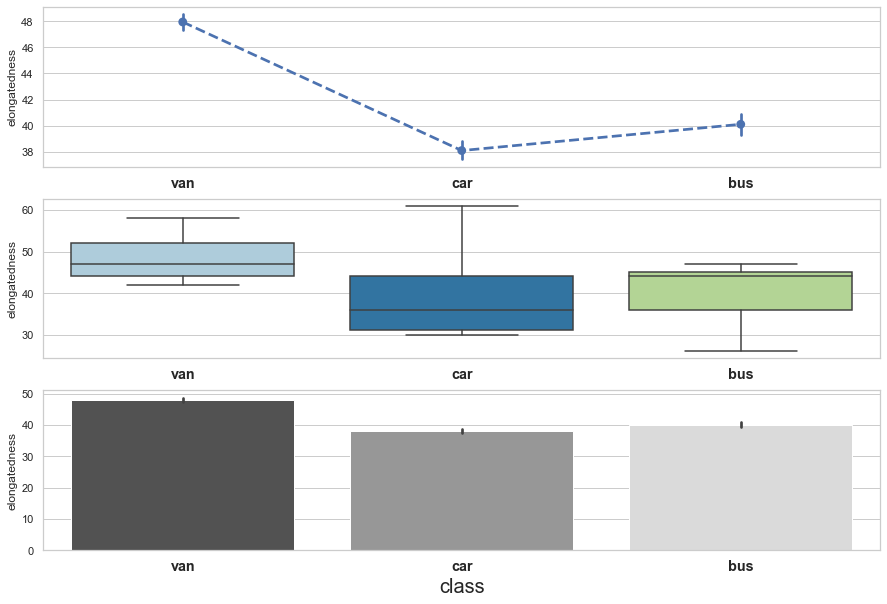

In [136]:
point_box_bar_plot('class','elongatedness', 15, 10, palette='Greys_r')

### Observations

No Outliers detected.

elongatedness of van is very high compared to others

elongatedness of bus is higher with car being the lowest.

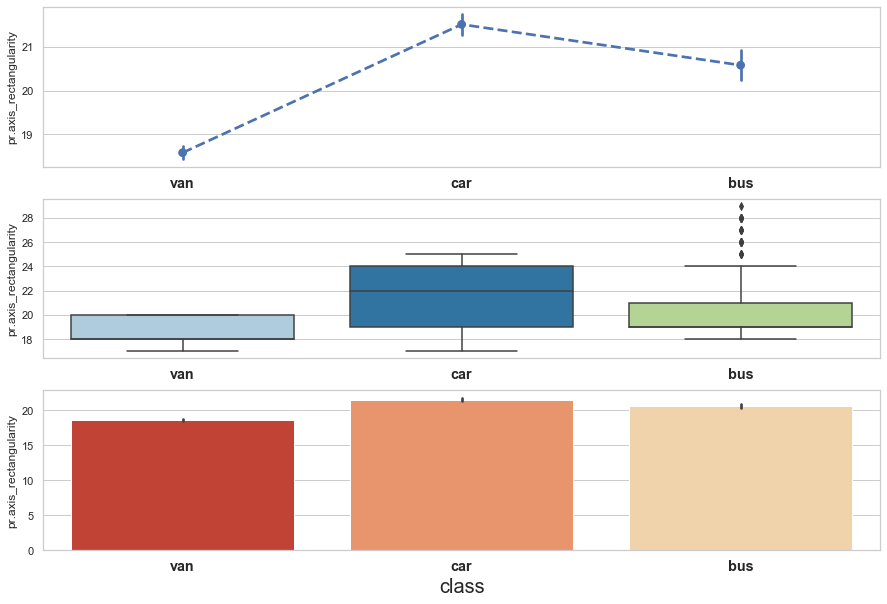

In [137]:
point_box_bar_plot('class','pr.axis_rectangularity', 15, 10, palette='OrRd_r')

### Observations

Outliers are detected for bus.

pr.axis_rectangularity of car is higher followed by bus.

pr.axis_rectangularity of van is low.


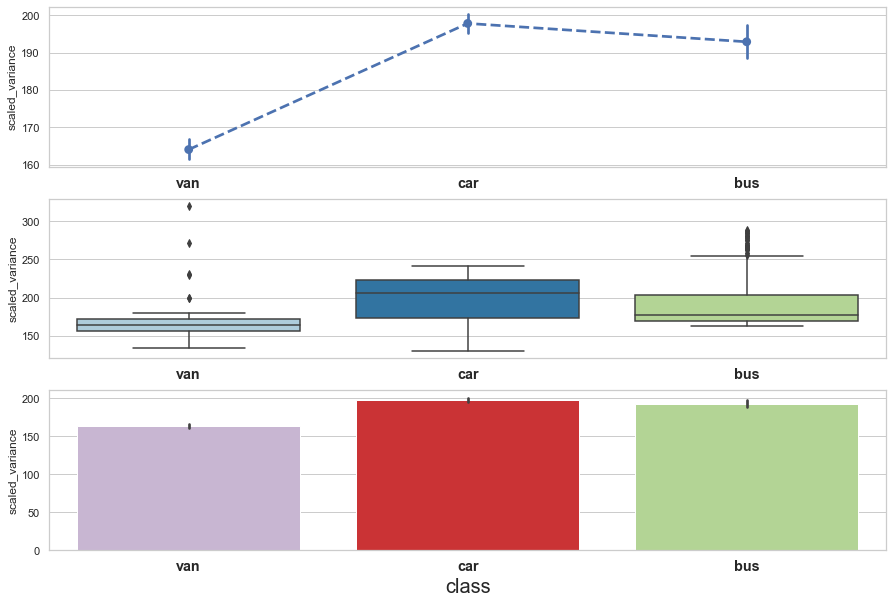

In [138]:
point_box_bar_plot('class','scaled_variance', 15, 10, palette='Paired_r')

### Observations

Outliers are detected for van and bus.

scaled_variance of car is higher followed by bus.

scaled_variance of van is low.

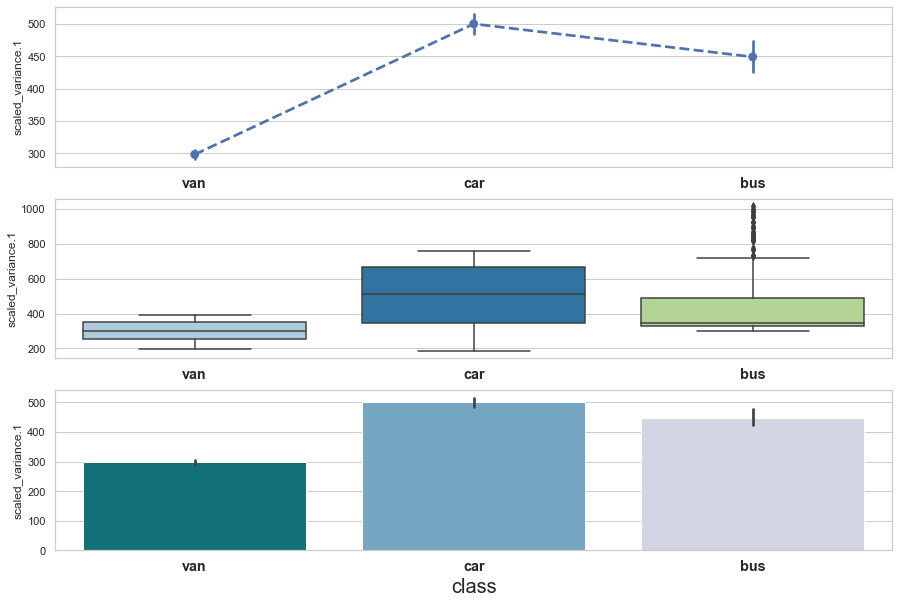

In [139]:
point_box_bar_plot('class','scaled_variance.1', 15, 10, palette='PuBuGn_r')

### Observations

Outliers are detected for bus.

scaled_variance.1 of car is higher followed by bus.

scaled_variance.1 of van is low.

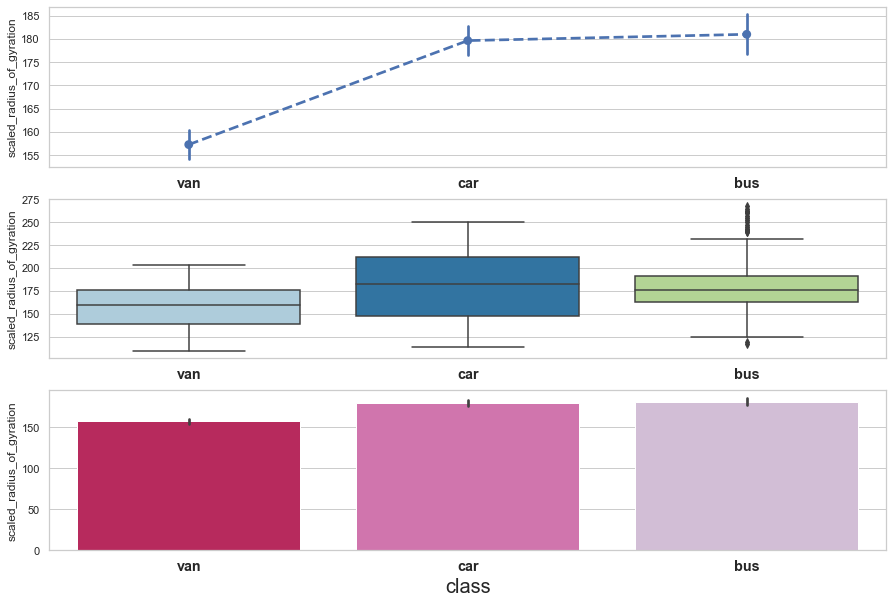

In [140]:
point_box_bar_plot('class','scaled_radius_of_gyration', 15, 10, palette='PuRd_r')

### Observations

Outliers are detected for bus.

scaled_radius_of_gyration of car and bus are very close and is higher.

Despite car having larger range of scaled_radius_of_gyration, outliers of bus push it slightly higher.

scaled_radius_of_gyration of van is low.

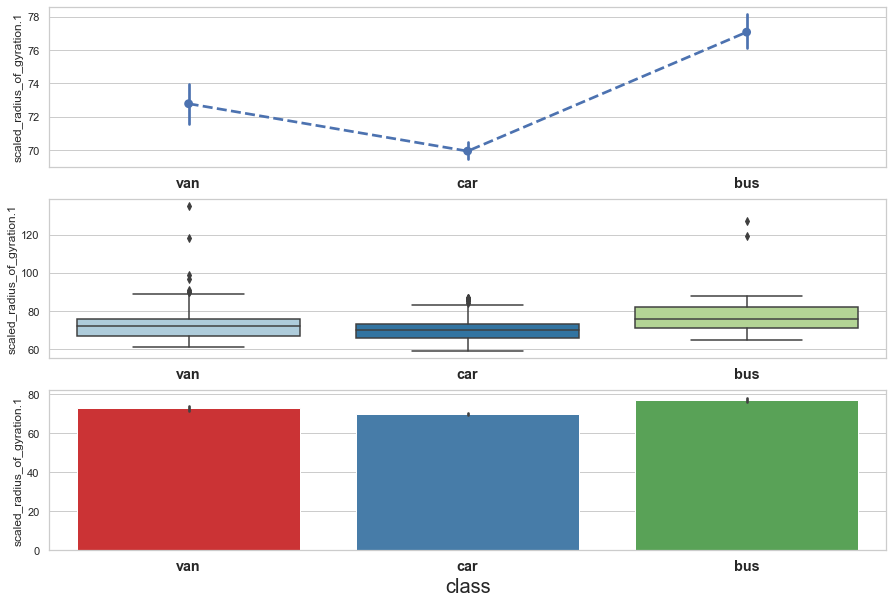

In [141]:
point_box_bar_plot('class','scaled_radius_of_gyration.1', 15, 10, palette='Set1')

### Observations

Outliers are detected for van, car and bus.

scaled_radius_of_gyration.1 of bus is higher than others followed by van and then by car.

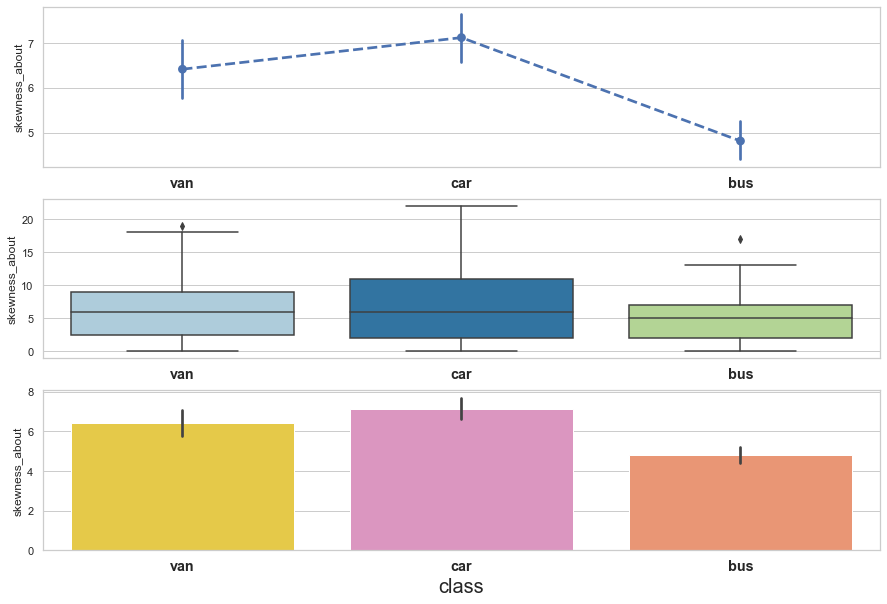

In [142]:
point_box_bar_plot('class','skewness_about', 15, 10, palette='Set2_r')

### Observations

Outliers are detected for van and bus.

skewness_about of car is higher than others followed by van.

skewness_about of bus is lowest.

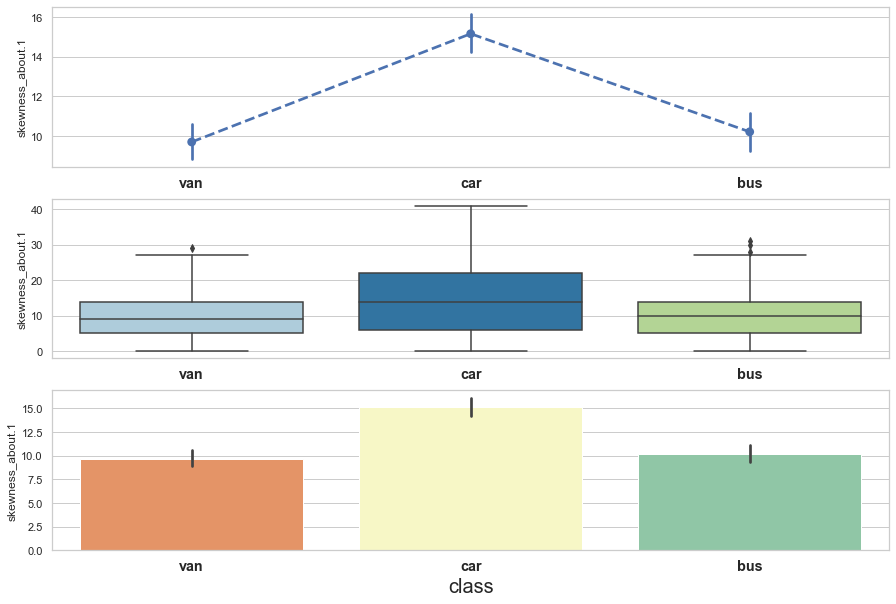

In [143]:
point_box_bar_plot('class','skewness_about.1', 15, 10, palette='Spectral')

### Observations

Outliers are detected for van and bus.

skewness_about.1 of car is higher than others.

skewness_about.1 of van and bus are lower.

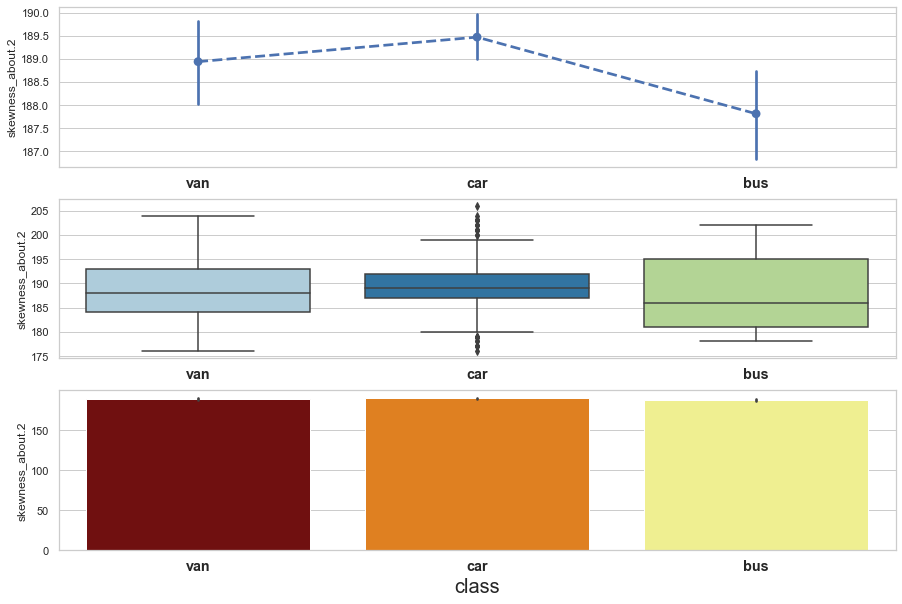

In [144]:
point_box_bar_plot('class','skewness_about.2', 15, 10, palette='afmhot')

### Observations

Outliers are detected for car on both higher and lower side.

skewness_about.2 of car is higher than others followed by van.

skewness_about.2 of bus is lowest.

### Multivariate Analysis using Pairplot and Correlation (Pearson's) Heatmap

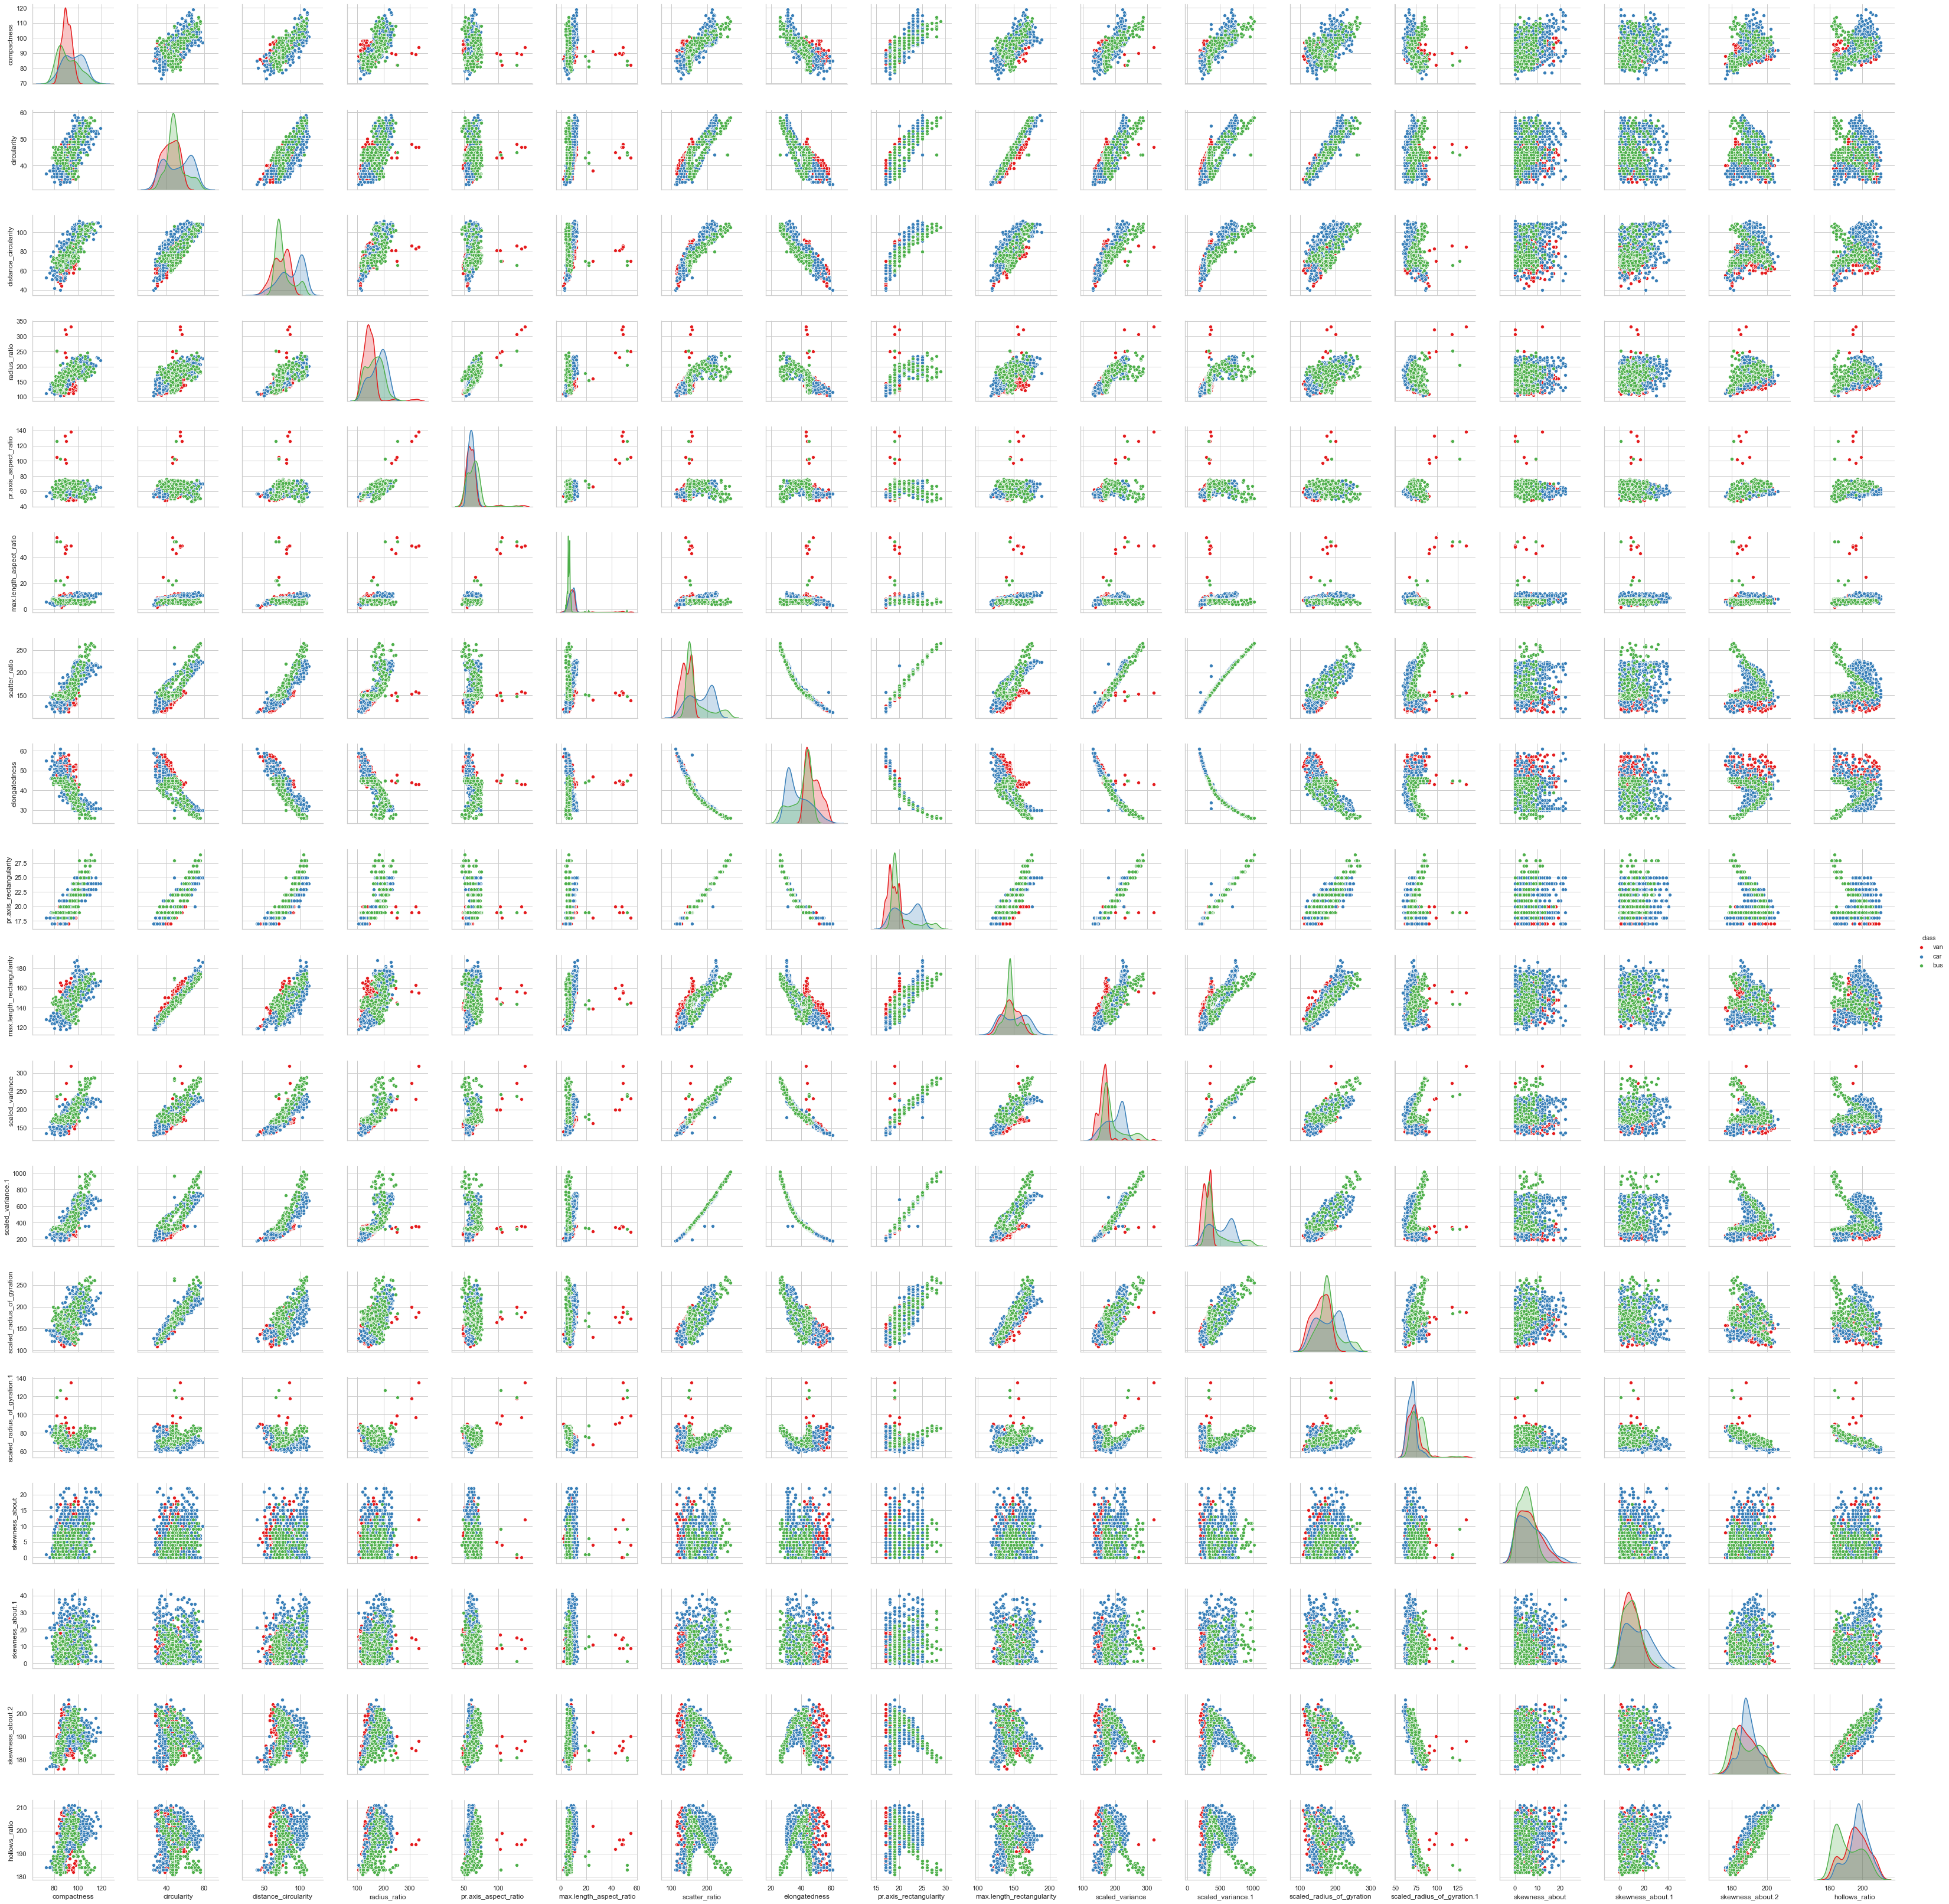

In [145]:
sns.pairplot(data=vehicle, hue='class', palette='Set1', diag_kind='kde')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text xticklabel objects>)

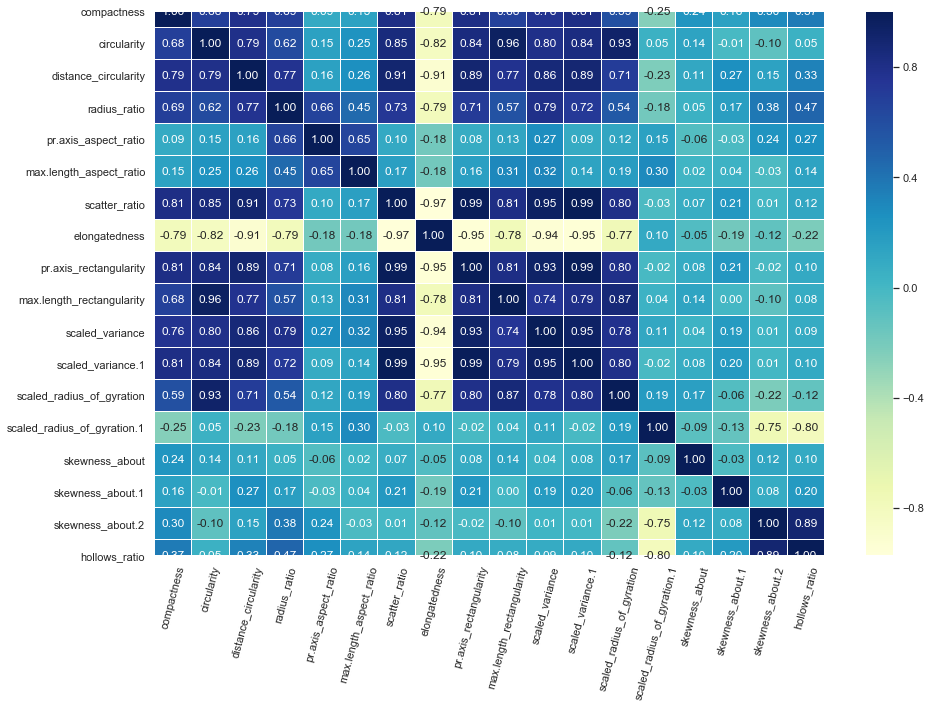

In [146]:
f, axes = plt.subplots(1, 1, figsize=(15, 10))
cor_mat = vehicle.corr()
hplot = sns.heatmap(cor_mat, annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.2, cmap='YlGnBu')
plt.xticks(rotation=75)

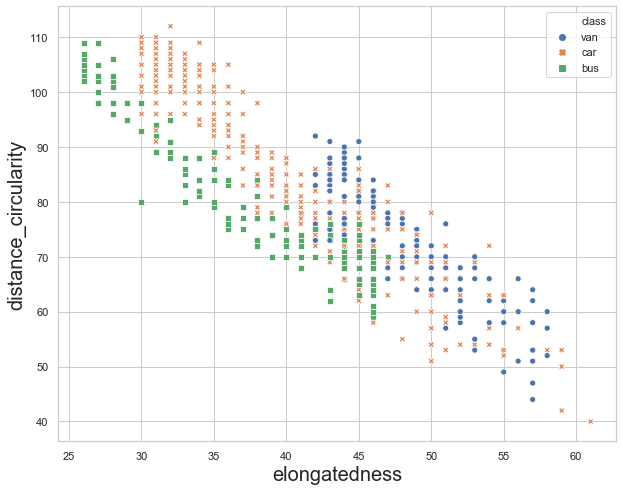

In [147]:
scatterplot('elongatedness', 'distance_circularity', vehicle)

elongatedness and distance_circularity has negative linear correlation

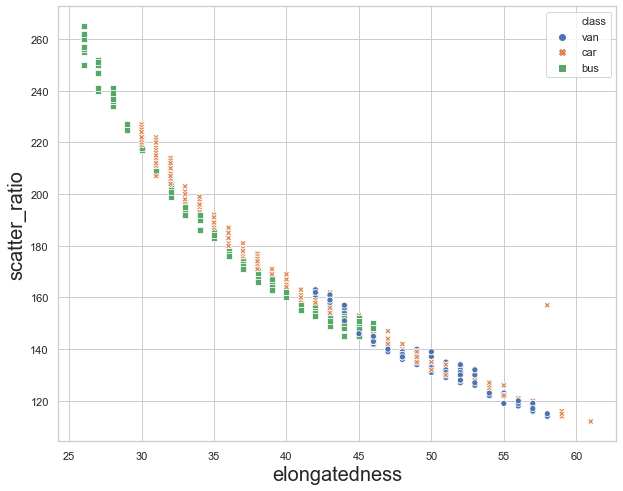

In [148]:
scatterplot('elongatedness', 'scatter_ratio', vehicle)

elongatedness and scatter_ratio has negative curvy-linear correlation.

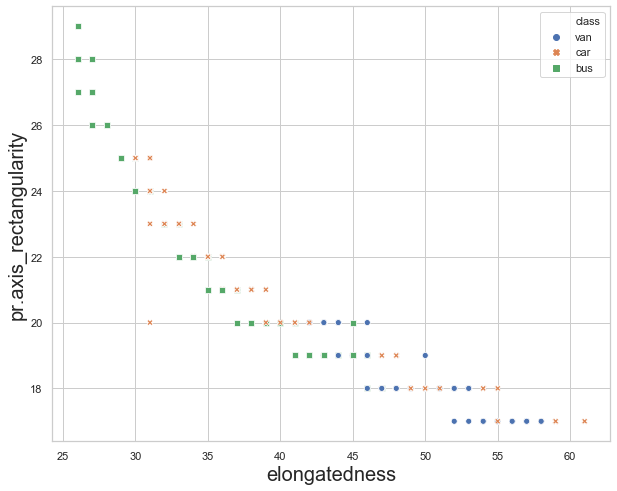

In [149]:
scatterplot('elongatedness', 'pr.axis_rectangularity', vehicle)

elongatedness and pr.axis_rectangularity has negative curvy-linear correlation.

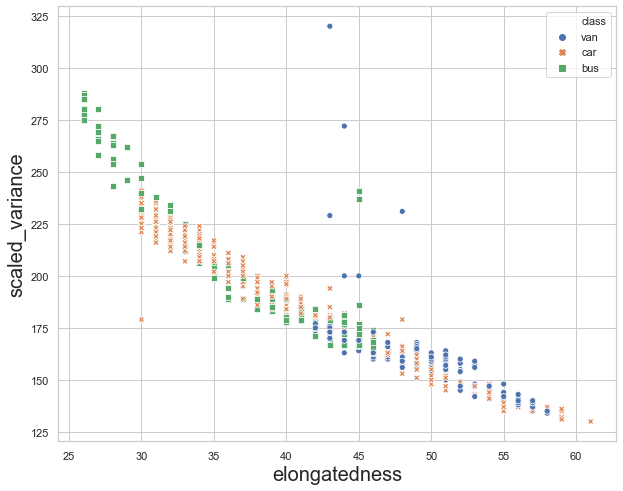

In [150]:
scatterplot('elongatedness', 'scaled_variance', vehicle)

elongatedness and scaled_variance has negative curvy-linear correlation.
We can also observe outliers.



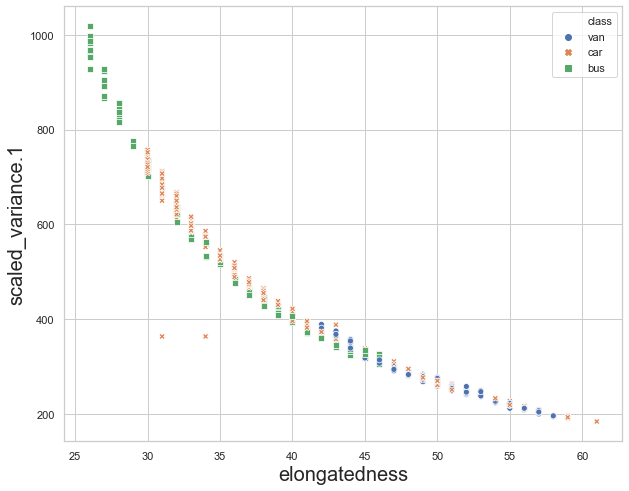

In [151]:
scatterplot('elongatedness', 'scaled_variance.1', vehicle)

elongatedness and scaled_variance.1 has negative curvy-linear correlation.
We can also observe outliers for car.

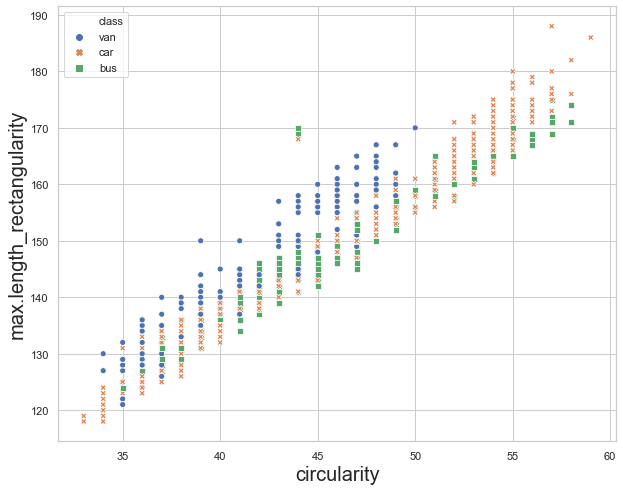

In [152]:
scatterplot('circularity', 'max.length_rectangularity', vehicle)


circularity and max.length_rectangularity has positive linear correlation.

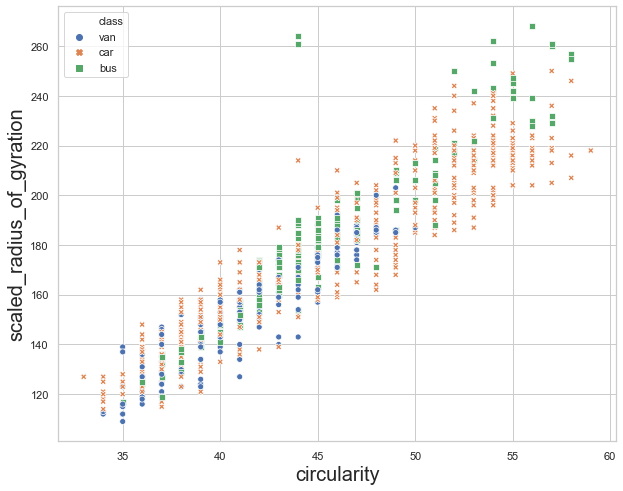

In [153]:
scatterplot('circularity', 'scaled_radius_of_gyration', vehicle)

circularity and scaled_radius_of_gyration has positive linear correlation.

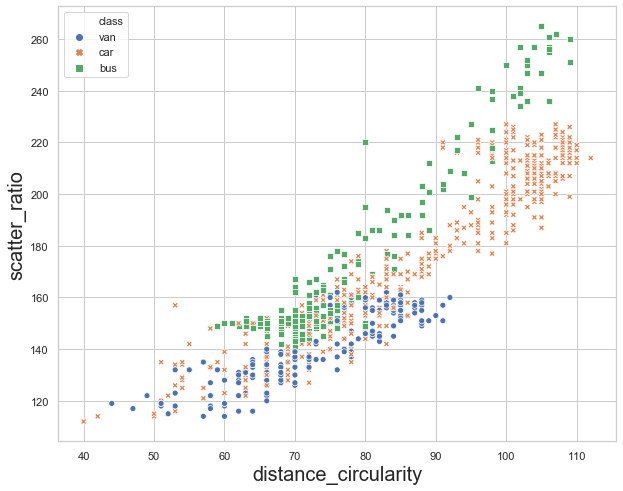

In [154]:
scatterplot('distance_circularity', 'scatter_ratio', vehicle)

distance_circularity and scatter_ratio has positive linear correlation with a slight curve.

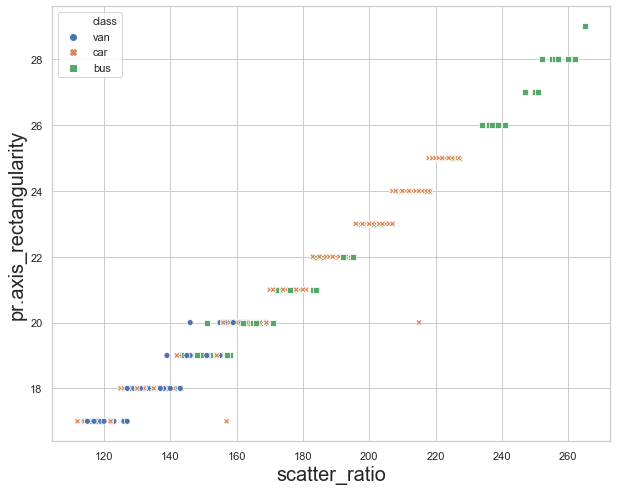

In [155]:
scatterplot('scatter_ratio', 'pr.axis_rectangularity', vehicle)

scatter_ratio and pr.axis_rectangularity has positive linear correlation.

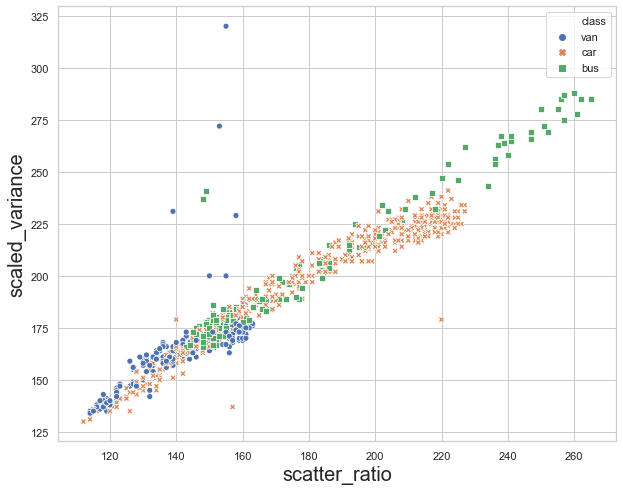

In [156]:
scatterplot('scatter_ratio', 'scaled_variance', vehicle)

scatter_ratio and scaled_variance has positive linear correlation.
We can also observe outliers.



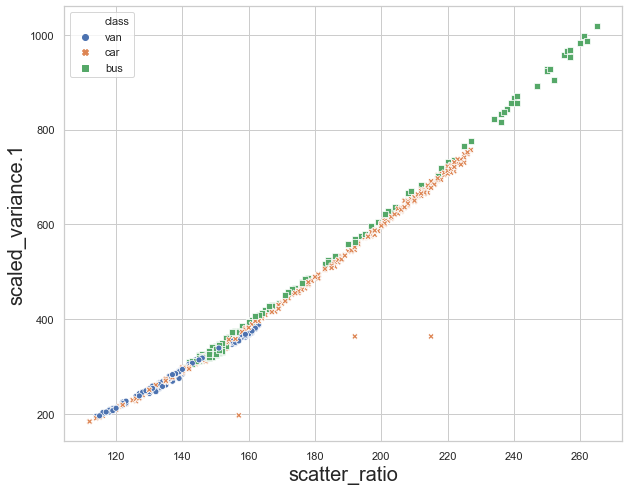

In [157]:
scatterplot('scatter_ratio', 'scaled_variance.1', vehicle)

scatter_ratio and scaled_variance.1 has positive linear correlation.
We can also observe outliers

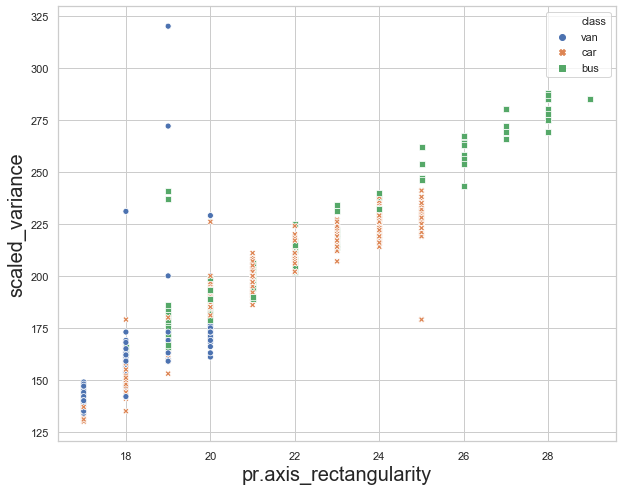

In [158]:
scatterplot('pr.axis_rectangularity', 'scaled_variance', vehicle)

pr.axis_rectangularity and scaled_variance has positive linear correlation.
We can also observe outliers.

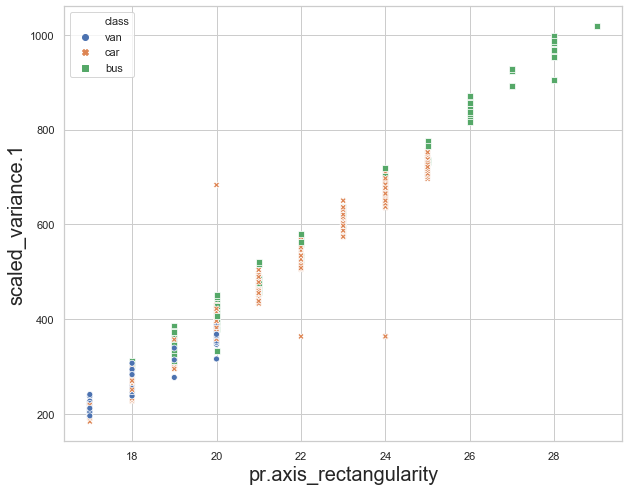

In [159]:
scatterplot('pr.axis_rectangularity', 'scaled_variance.1', vehicle)

pr.axis_rectangularity and scaled_variance.1 has positive linear correlation.
We can also observe outliers.

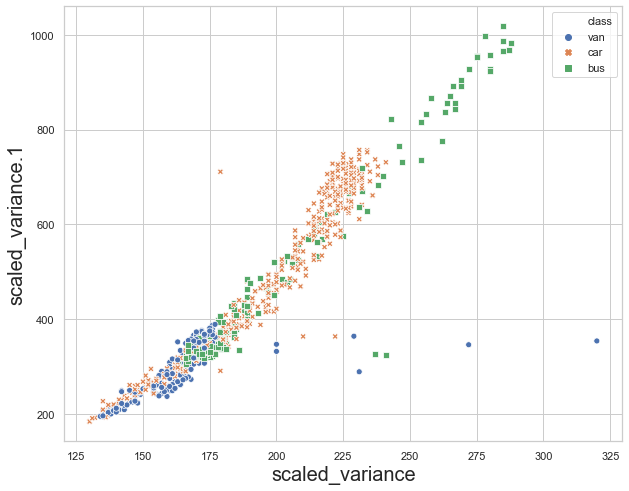

In [160]:
scatterplot('scaled_variance', 'scaled_variance.1', vehicle)

scaled_variance and scaled_variance.1 has positive linear correlation.
We can also observe outliers.

### Data PreProcessing

In [161]:
vehicle=vehicle.replace({'skewness_about': {0: vehicle['skewness_about'].median()}}) 
vehicle=vehicle.replace({'skewness_about.1': {0: vehicle['skewness_about.1'].median()}}) 

In [162]:
vehicle_new = vehicle.copy()

### Removing Attributes due to Multicollinearity

In [163]:
def CheckCorrelationUpper(data):
    # Create correlation matrix
    corr_matrix = data.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    f, axes = plt.subplots(1, 1, figsize=(15, 10))
    sns.heatmap(upper,cmap='YlGnBu', annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.2)
    plt.xticks(rotation=75)
    return upper


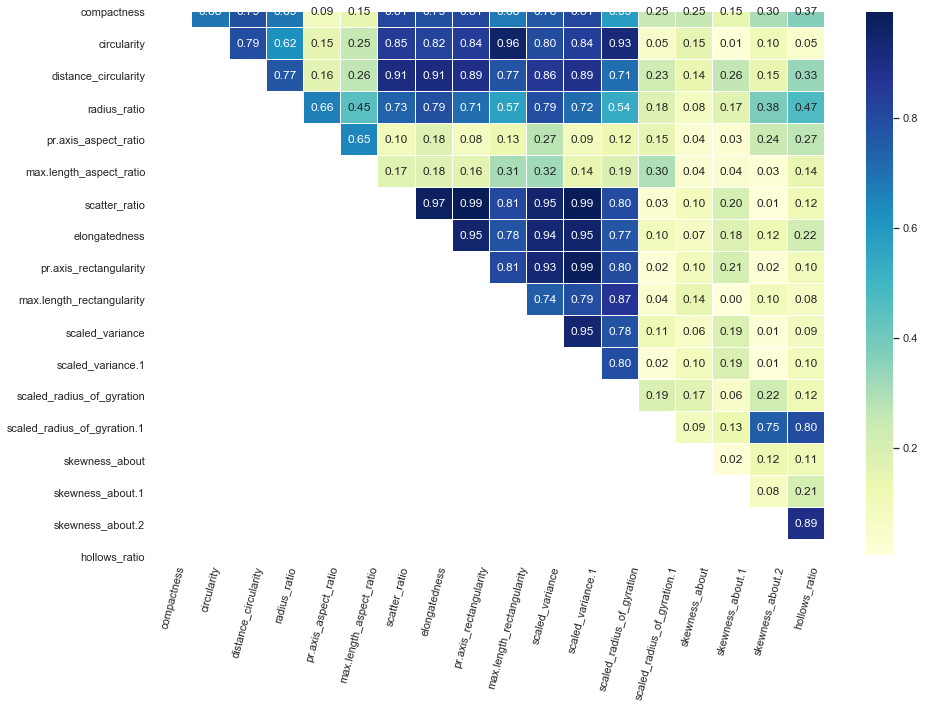

In [164]:
upper = CheckCorrelationUpper(vehicle)

In [165]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
printmd('List of columns with correlation higher than 0.90', color='brown')
display(to_drop)

<span style='color:brown'>List of columns with correlation higher than 0.90</span>

['scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration']

In [166]:
vehicle.drop(['scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance.1', 'circularity'], axis=1, inplace=True)

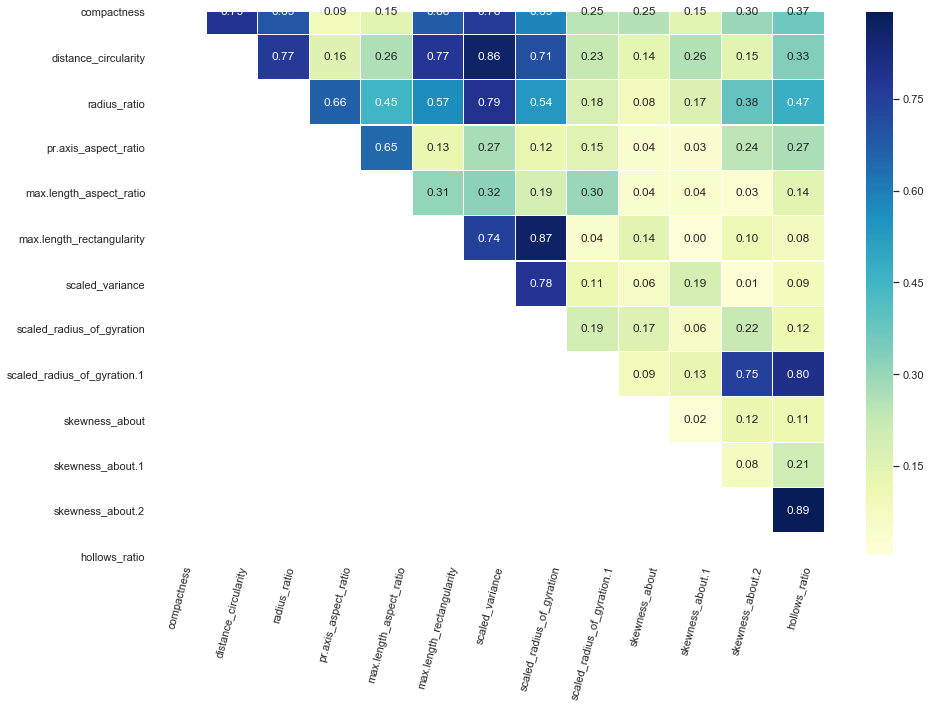

In [167]:
upper = CheckCorrelationUpper(vehicle)

### Removing Outliers using ZScore factor 3

In [168]:
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    indices = data[condition].index
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)
    return indices

#### Measure of Skewness


In [169]:
vehicle.skew().sort_values()

hollows_ratio                 -0.226341
distance_circularity           0.108718
skewness_about.2               0.249985
max.length_rectangularity      0.256359
scaled_radius_of_gyration      0.279910
compactness                    0.381271
radius_ratio                   0.397572
scaled_variance                0.655598
skewness_about.1               0.745118
skewness_about                 0.917076
scaled_radius_of_gyration.1    2.089979
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
dtype: float64

max.length_aspect_ratio, pr.axis_aspect_ratio, scaled_radius_of_gyration.1 are highly skewed as value is above 2

scatter_ratio, scaled_variance, skewness_about.1, pr.axis_rectangularity, skewness_about, scaled_variance.1 are moderately skewed

All other attributes given below are evenly distributed as skewness value is close to zero.

hollows_ratio, elongatedness, distance_circularity, skewness_about.2, max.length_rectangularity, circularity, scaled_radius_of_gyration, compactness, radius_ratio

In [170]:
max_length_aspect_ratio_index = remove_outliers('max.length_aspect_ratio', vehicle)
remove_outliers('pr.axis_aspect_ratio', vehicle)
remove_outliers('scaled_radius_of_gyration.1', vehicle)

(9, 15)
(0, 15)
(0, 15)


Int64Index([], dtype='int64')

In [171]:
vehicle.shape

(837, 14)

A total of 9 records are removed from the dataset which is very insignificant compared to total count of 846

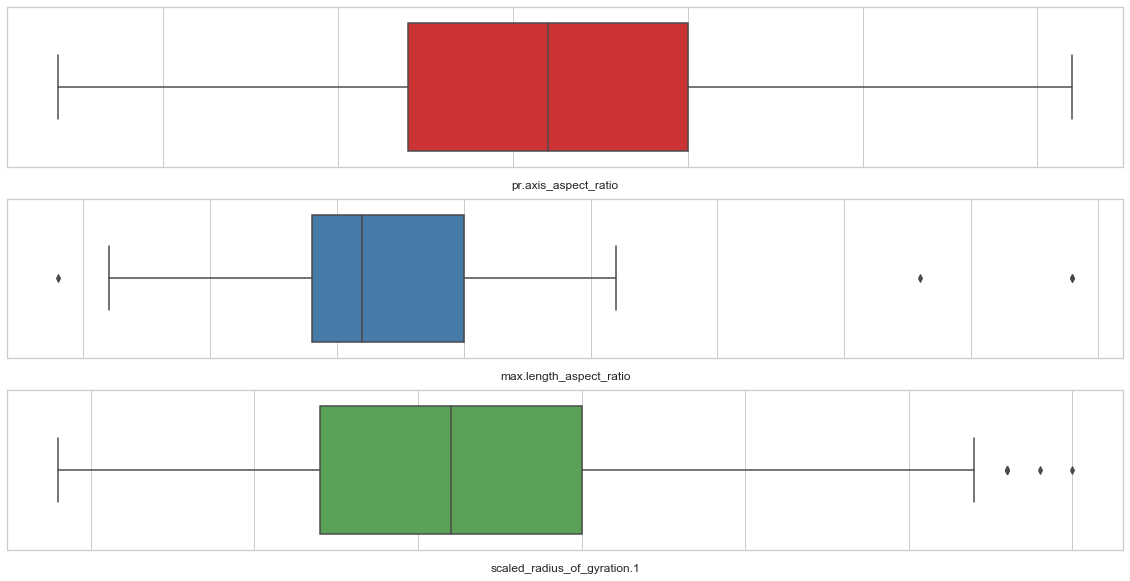

In [172]:
boxplot(3, 1, 20, 10, orient='h', 
        features=['pr.axis_aspect_ratio',
                  'max.length_aspect_ratio',                  
                  'scaled_radius_of_gyration.1'], 
        colors=pal.as_hex()[:3])

we have removed/reduced outliers for these attributes

In [173]:
vehicle.skew().sort_values()

hollows_ratio                 -0.228508
radius_ratio                   0.090299
distance_circularity           0.100900
pr.axis_aspect_ratio           0.162118
skewness_about.2               0.241363
max.length_rectangularity      0.260009
scaled_radius_of_gyration      0.283031
compactness                    0.370181
scaled_radius_of_gyration.1    0.564367
scaled_variance                0.608419
max.length_aspect_ratio        0.715324
skewness_about.1               0.739859
skewness_about                 0.916228
dtype: float64

skewness is reduced and are below 0.8

In [174]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

def lencode(col, data):
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col]) # returns label encoded variable(s)
    return data

In [175]:
vehicle = lencode('class', vehicle)

In [176]:
vehicle['class'].value_counts()

1    429
0    216
2    192
Name: class, dtype: int64

#### Scaling Attributes

In [177]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
vehicle.iloc[:,:13] = std_scale.fit_transform(vehicle.iloc[:,:13])

In [178]:
vehicle.head()

compactness  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.152918              0.053422      0.316138              1.924444   
1    -0.332361              0.116757     -0.846211             -0.736210   
2     1.244796              1.510123      1.289997              0.860183   
3    -0.089722             -0.009913     -0.280744              0.328052   
5     1.608756              1.510123      0.127649             -1.977848   

   max.length_aspect_ratio  max.length_rectangularity  scaled_variance  \
0                 0.827841                   0.757462        -0.392910   
1                 0.378196                  -0.341437        -0.587332   
2                 0.827841                   0.688781         1.130065   
3                 0.378196                  -0.341437        -0.911369   
5                -0.970739                   1.444274         2.977078   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                   0.284934                    -0.329226       -0.203879   
1                  -0.511564                    -0.015016        0.464451   
2                   1.387777                     0.142089        1.578335   
3                  -1.461234                    -1.428962       -0.203879   
5                   2.735695                     2.027350       -0.426656   

   skewness_about.1  skewness_about.2  hollows_ratio  class  
0          0.345754         -0.317575       0.180493      2  
1          0.114052          0.007178       0.449067      2  
2         -0.465204         -0.155198       0.046206      1  
3         -0.349352          1.630941       1.523363      2  
5         -0.465204         -1.291832      -1.699525      0

## Split the data into training and test set in the ratio of 70:30 respectively

In [179]:
X = vehicle.loc[:, vehicle.columns != 'class']
y = vehicle['class']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.30, random_state=10)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 585 rows and 13 columns
Testing set has 252 rows and 13 columns


## Support Vector Machine Classifier

In [181]:
from sklearn.model_selection import GridSearchCV

def find_best_model(model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy')
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [182]:
svm = SVC()
parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'gamma':('scale','auto'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'class_weight': (None, 'balanced')}
clf = find_best_model(svm, parameters)

0.9504273504273504
{'C': 0.8, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Fit, Predict and Accuracy

In [183]:
svm = clf.best_estimator_
svm.fit(X_train, y_train)  
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

#get Precision Score on train and test
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf

Accuracy
Training     0.968
Testing      0.937

This is a good model as we have accuracy of 96.8% for training set and 93.7% for test set.

### K-Fold Cross Validation - 50 Splits

In [185]:
kkfold = KFold(n_splits=50, random_state=10)
results = cross_val_score(svm, X, y, cv=kfold)
display(results)
kfold_result = pd.DataFrame([[results.mean()*100.0, results.std()*100.0]], index=['KFold'], columns=['Mean Accuracy', 'Standard Deviation'])
kfold_result

array([1.        , 0.82352941, 1.        , 0.88235294, 1.        ,
       1.        , 1.        , 0.94117647, 0.94117647, 1.        ,
       0.94117647, 1.        , 0.94117647, 0.88235294, 1.        ,
       0.94117647, 1.        , 1.        , 1.        , 1.        ,
       0.94117647, 0.94117647, 1.        , 1.        , 1.        ,
       1.        , 0.94117647, 0.94117647, 0.94117647, 1.        ,
       0.94117647, 0.82352941, 1.        , 1.        , 0.82352941,
       0.94117647, 1.        , 1.        , 0.9375    , 1.        ,
       0.875     , 1.        , 0.9375    , 1.        , 0.875     ,
       1.        , 0.875     , 1.        , 1.        , 0.9375    ])

Mean Accuracy  Standard Deviation
KFold      95.933824            5.264115

KFold cross validation has resulted in a accuracy mean of 95.93% with a standard deviation of 5.26.

### Confusion Matrix 

In [186]:
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test

Predicted   0    1   2
Actual                
0          71    2   2
1           2  114   3
2           3    4  51

Total number of Type-I and Type-II errors are 16

## Dimensionality Reduction - Principal Component Analysis

In [187]:
vehicle_new.drop(max_length_aspect_ratio_index, axis = 0, inplace = True)
vehicle_new = lencode('class', vehicle_new)
std_scale = StandardScaler()
vehicle_new.iloc[:,:18] = std_scale.fit_transform(vehicle_new.iloc[:,:18])
X = vehicle_new.loc[:, vehicle_new.columns != 'class']
y = vehicle_new['class']

### PCA with all 18 attributes

In [188]:
from sklearn.decomposition import PCA
pca_full = PCA(n_components=18)
pca_full.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [189]:
pca_full.explained_variance_ratio_

array([5.42817939e-01, 1.87167231e-01, 6.51425276e-02, 6.27016551e-02,
       4.96829633e-02, 3.79553795e-02, 1.87199756e-02, 1.22722493e-02,
       6.55687911e-03, 4.75276049e-03, 3.55177257e-03, 2.62837681e-03,
       1.80178518e-03, 1.50794369e-03, 1.08515273e-03, 9.52150971e-04,
       5.38799036e-04, 1.64458248e-04])

Text(0, 0.5, 'Explained Variance')

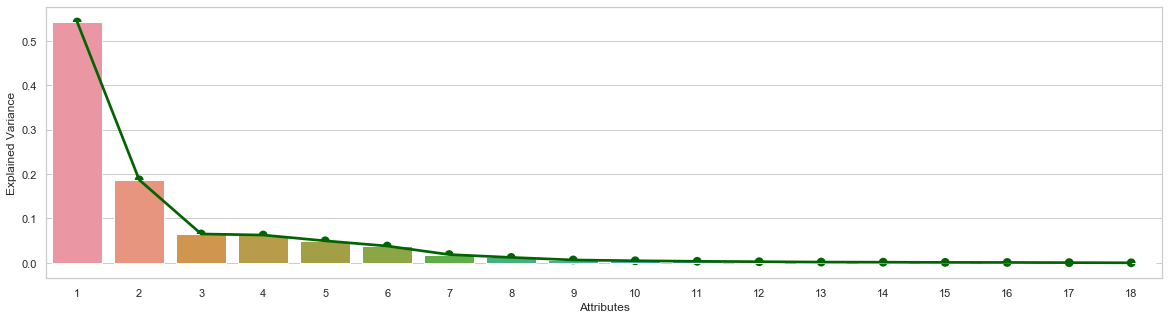

In [190]:
f, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(list(range(1,19)), pca_full.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(list(range(1,19)), pca_full.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

As we can observe, explained variance decreases from attributes 1 to 9 and goes on to become '0' from attribute 10 to 18.

We can use first 8 attributes for the PCA transformation leaving the rest. That way, we can still achieve more than 95% variance.

### PCA with 8 principal attributes

In [191]:
pca8 = PCA(n_components=8)
X_PCA8 = pca8.fit_transform(X)

### Multivariate Analysis of 8 Principal Components

In [192]:
p_plot_data = pd.DataFrame(X_PCA8)
p_plot_data['class'] = y

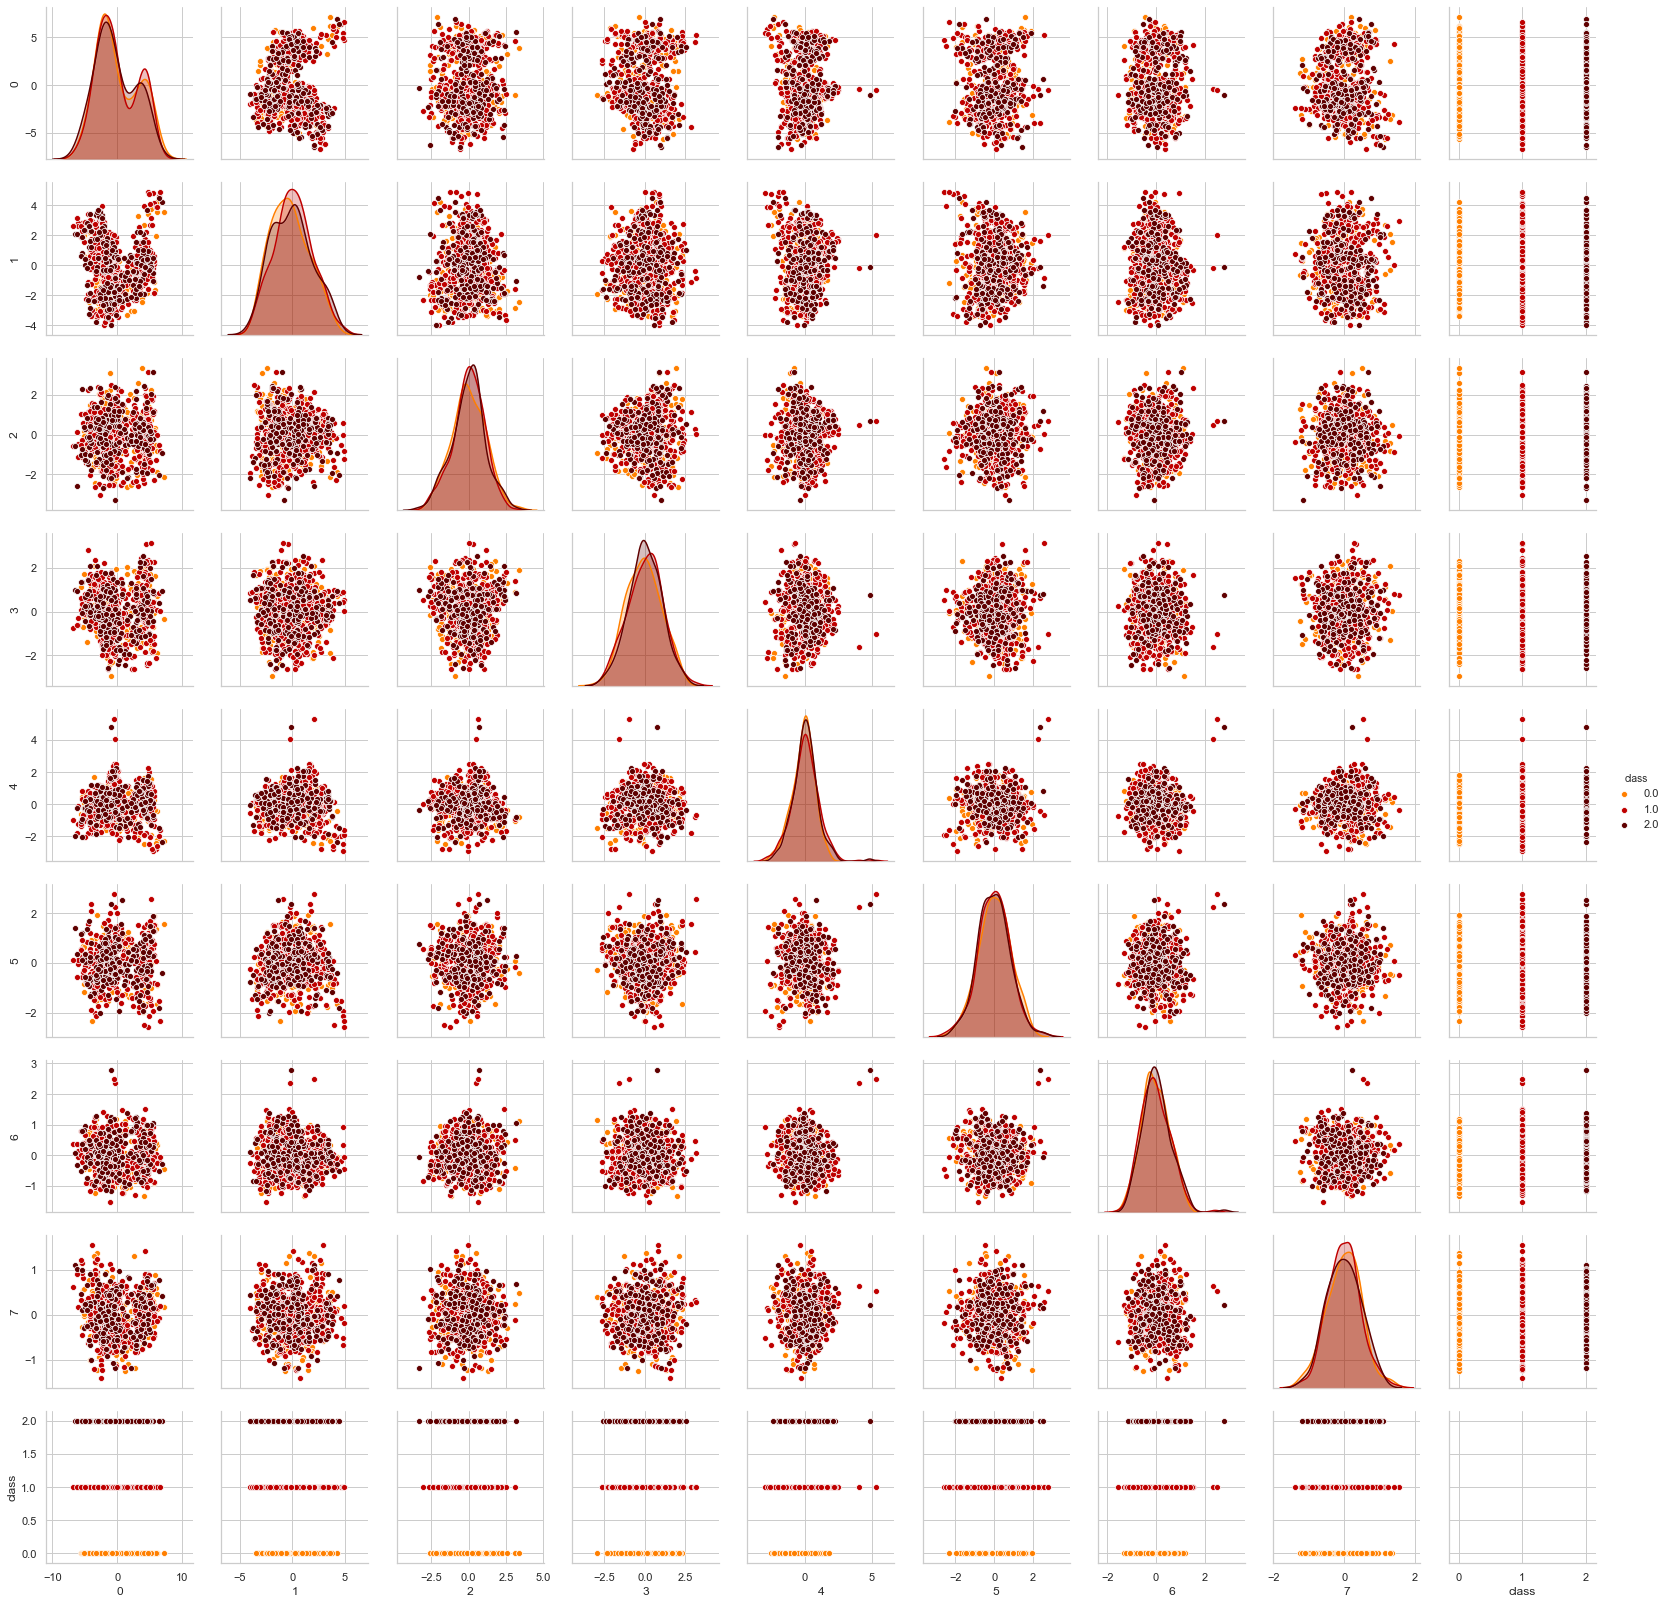

In [193]:
sns.pairplot(p_plot_data, diag_kind='kde', hue='class', palette='gist_heat_r')

Using the same random state as 10

In [194]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_PCA8, y, test_size =.30, random_state=10)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_pca_train.shape[0]} rows and {X_pca_train.shape[1]} columns')
print(f'Testing set has {X_pca_test.shape[0]} rows and {X_pca_test.shape[1]} columns')

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 585 rows and 8 columns
Testing set has 252 rows and 8 columns


### Fit, Predict and Accuracy - PCA


In [195]:
svm.fit(X_pca_train, y_train)  
y_train_pred = svm.predict(X_pca_train)
y_test_pred = svm.predict(X_pca_test)

#get Precision Score on train and test
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf_pca = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf_pca

Accuracy
Training     0.985
Testing      0.937

This is a good model as we have accuracy of 98.5% for training set and 93.7% for test set

### K-Fold Cross Validation - 50 Splits - PCA

In [196]:
results = cross_val_score(svm, X_PCA8, y, cv=kfold)
print(results)
kfold_result_pca = pd.DataFrame([[results.mean()*100.0, results.std()*100.0]], index=['KFold'], columns=['Mean Accuracy', 'Standard Deviation'])
kfold_result_pca

[1.         0.82352941 1.         0.94117647 0.94117647 1.
 0.94117647 1.         1.         1.         0.94117647 1.
 0.88235294 0.94117647 1.         0.94117647 0.94117647 0.94117647
 1.         1.         0.94117647 0.94117647 0.94117647 1.
 1.         1.         0.94117647 1.         0.94117647 0.94117647
 0.94117647 0.88235294 1.         1.         0.94117647 0.82352941
 1.         1.         1.         1.         0.875      1.
 1.         1.         0.875      1.         0.9375     0.9375
 1.         0.9375    ]


Mean Accuracy  Standard Deviation
KFold      96.066176            4.710045

KFold cross validation for PCA has resulted in a accuracy mean of 96.00% with a standard deviation of 4.71.

### Confusion Matrix - PCA

In [197]:
confusion_matrix_test_pca = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test_pca

Predicted   0    1   2
Actual                
0          72    1   2
1           2  113   4
2           2    5  51

Total number of Type-I and Type-II errors are 12

Even after reducing dimensions from 13 to 8, we still have achieved very good results by doing PCA in terms for accuracy.

In [198]:
printmd('**SVM Standard**', color='brown')
display_side_by_side([accdf, kfold_result,confusion_matrix_test])

<span style='color:brown'>**SVM Standard**</span>

Accuracy 
 
 
 
 
 Training 
 0.968 
 
 
 Testing 
 0.937 
 
 
 
 
 
 
 Mean Accuracy 
 Standard Deviation 
 
 
 
 
 KFold 
 95.933824 
 5.264115 
 
 
 
 
 
 Predicted 
 0 
 1 
 2 
 
 
 Actual 
 
 
 
 
 
 
 
 0 
 71 
 2 
 2 
 
 
 1 
 2 
 114 
 3 
 
 
 2 
 3 
 4 
 51

In [199]:
printmd('**SVM with PCA**', color='brown')
display_side_by_side([accdf_pca, kfold_result_pca,confusion_matrix_test_pca])

<span style='color:brown'>**SVM with PCA**</span>

Accuracy 
 
 
 
 
 Training 
 0.985 
 
 
 Testing 
 0.937 
 
 
 
 
 
 
 Mean Accuracy 
 Standard Deviation 
 
 
 
 
 KFold 
 96.066176 
 4.710045 
 
 
 
 
 
 Predicted 
 0 
 1 
 2 
 
 
 Actual 
 
 
 
 
 
 
 
 0 
 72 
 1 
 2 
 
 
 1 
 2 
 113 
 4 
 
 
 2 
 2 
 5 
 51